In [1]:
# !pip install git+https://github.com/alberanid/imdbpy
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas_profiling --upgrade
# !pip install plotly
# !pip install wordcloud
# !pip install Flask

In [2]:
# Import Dataset
# Import File from Loacal Drive
# from google.colab import files
# data_to_load = files.upload()
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import collections
import plotly.express as px
import plotly.graph_objects as go
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
from wordcloud import WordCloud, STOPWORDS
from pandas_profiling import ProfileReport
%matplotlib inline
warnings.filterwarnings("ignore")

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\p

[nltk_data]    |   Package problem_reports is already up-to-date!
[nltk_data]    | Downloading package propbank to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package propbank is already up-to-date!
[nltk_data]    | Downloading package ptb to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downloading package pros_cons to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pros_cons is already up-to-date!
[nltk_data]    | Downloading package qc t

[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package bllip_wsj_no_aux to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-

True

In [5]:
# path = '/content/drive/MyDrive/Files/'

path = 'C:\\Users\\pawan\\OneDrive\\Desktop\\ott\\Data\\'
 
df_movies = pd.read_csv(path + 'ottmovies.csv')
 
df_movies.head()

ID                           Title  Year  Age  IMDb Rotten Tomatoes  \
0   1                       Inception  2010  13+   8.8             87%   
1   2                      The Matrix  1999  16+   8.7             88%   
2   3          Avengers: Infinity War  2018  13+   8.4             85%   
3   4              Back to the Future  1985   7+   8.5             96%   
4   5  The Good, the Bad and the Ugly  1966  16+   8.8             97%   

                        Directors  \
0               Christopher Nolan   
1  Lana Wachowski,Lilly Wachowski   
2         Anthony Russo,Joe Russo   
3                 Robert Zemeckis   
4                    Sergio Leone   

                                                Cast  \
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
1  Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...   
2  Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...   
3  Michael J. Fox,Christopher Lloyd,Lea Thompson,...   
4  Eli Wallach,Clint Eastwood,Lee Van Cleef,Aldo ...   

                             Genres                                 Country  \
0  Action,Adventure,Sci-Fi,Thriller            United States,United Kingdom   
1                     Action,Sci-Fi                           United States   
2           Action,Adventure,Sci-Fi                           United States   
3           Adventure,Comedy,Sci-Fi                           United States   
4                           Western  Italy,Spain,West Germany,United States   

                  Language                                           Plotline  \
0  English,Japanese,French  Dom Cobb is a skilled thief, the absolute best...   
1                  English  Thomas A. Anderson is a man living two lives. ...   
2                  English  As the Avengers and their allies have continue...   
3                  English  Marty McFly, a typical American teenager of th...   
4                  Italian  Blondie (The Good) (Clint Eastwood) is a profe...   

   Runtime   Kind  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  
0    148.0  movie      NaN        1     0            0        0     0  
1    136.0  movie      NaN        1     0            0        0     0  
2    149.0  movie      NaN        1     0            0        0     0  
3    116.0  movie      NaN        1     0            0        0     0  
4    161.0  movie      NaN        1     0            1        0     0

In [6]:
# profile = ProfileReport(df_movies)
# profile

In [7]:
def data_investigate(df):
    print('No of Rows : ', df.shape[0])
    print('No of Coloums : ', df.shape[1])
    print('**'*25)
    print('Colums Names : \n', df.columns)
    print('**'*25)
    print('Datatype of Columns : \n', df.dtypes)
    print('**'*25)
    print('Missing Values : ')
    c = df.isnull().sum()
    c = c[c > 0]
    print(c)
    print('**'*25)
    print('Missing vaules %age wise :\n')
    print((100*(df.isnull().sum()/len(df.index))))
    print('**'*25)
    print('Pictorial Representation : ')
    plt.figure(figsize = (10, 10))
    sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
    plt.show()

No of Rows :  16923
No of Coloums :  20
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Seasons', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime            float64
Kind                object
Seasons            float64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
dtype: object
*************

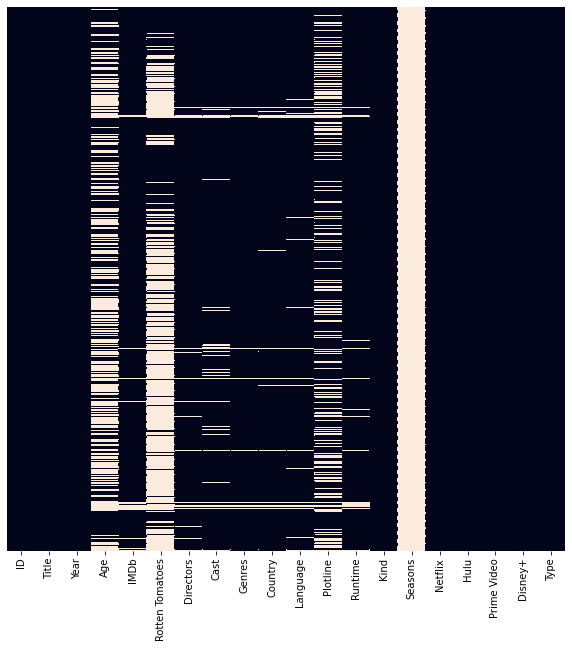

In [8]:
data_investigate(df_movies)

In [9]:
# ID
# df_movies = df_movies.drop(['ID'], axis = 1)
 
# Age
df_movies.loc[df_movies['Age'].isnull() & df_movies['Disney+'] == 1, "Age"] = '13'
# df_movies.fillna({'Age' : 18}, inplace = True)
df_movies.fillna({'Age' : 'NR'}, inplace = True)
df_movies['Age'].replace({'all': '0'}, inplace = True)
df_movies['Age'].replace({'7+': '7'}, inplace = True)
df_movies['Age'].replace({'13+': '13'}, inplace = True)
df_movies['Age'].replace({'16+': '16'}, inplace = True)
df_movies['Age'].replace({'18+': '18'}, inplace = True)
# df_movies['Age'] = df_movies['Age'].astype(int)
 
# IMDb
# df_movies.fillna({'IMDb' : df_movies['IMDb'].mean()}, inplace = True)
# df_movies.fillna({'IMDb' : df_movies['IMDb'].median()}, inplace = True)
df_movies.fillna({'IMDb' : "NA"}, inplace = True)
 
# Rotten Tomatoes
df_movies['Rotten Tomatoes'] = df_movies['Rotten Tomatoes'][df_movies['Rotten Tomatoes'].notnull()].str.replace('%', '').astype(int)
# df_movies['Rotten Tomatoes'] = df_movies['Rotten Tomatoes'][df_movies['Rotten Tomatoes'].notnull()].astype(int)
# df_movies.fillna({'Rotten Tomatoes' : df_movies['Rotten Tomatoes'].mean()}, inplace = True)
# df_movies.fillna({'Rotten Tomatoes' : df_movies['Rotten Tomatoes'].median()}, inplace = True)
# df_movies['Rotten Tomatoes'] = df_movies['Rotten Tomatoes'].astype(int)
df_movies.fillna({'Rotten Tomatoes' : "NA"}, inplace = True)
 
# Casts
# df_movies = df_movies.drop(['Casts'], axis = 1)
df_movies.fillna({'Directors' : "NA"}, inplace = True)
 
# Cast
df_movies.fillna({'Cast' : "NA"}, inplace = True)
 
# Genres
df_movies.fillna({'Genres': "NA"}, inplace = True)
 
# Country
df_movies.fillna({'Country': "NA"}, inplace = True)
 
# Language
df_movies.fillna({'Language': "NA"}, inplace = True)
 
# Plotline
df_movies.fillna({'Plotline': "NA"}, inplace = True)
 
# Runtime
# df_movies.fillna({'Runtime' : df_movies['Runtime'].mean()}, inplace = True)
# df_movies['Runtime'] = df_movies['Runtime'].astype(int)
df_movies.fillna({'Runtime' : "NA"}, inplace = True)
 
# Kind
# df_movies.fillna({'Kind': "NA"}, inplace = True)
 
# Type
# df_movies.fillna({'Type': "NA"}, inplace = True)
# df_movies = df_movies.drop(['Type'], axis = 1)
 
# Seasons
# df_movies.fillna({'Seasons': 1}, inplace = True)
# df_movies.fillna({'Seasons': "NA"}, inplace = True)
df_movies = df_movies.drop(['Seasons'], axis = 1)
# df_movies['Seasons'] = df_movies['Seasons'].astype(int)
# df_movies.fillna({'Seasons' : df_movies['Seasons'].mean()}, inplace = True)
# df_movies['Seasons'] = df_movies['Seasons'].astype(int)
 
# Service Provider
df_movies['Service Provider'] = df_movies.loc[:, ['Netflix', 'Prime Video', 'Disney+', 'Hulu']].idxmax(axis = 1)
# df_movies.drop(['Netflix','Prime Video','Disney+','Hulu'], axis = 1)

# Removing Duplicate and Missing Entries
df_movies.dropna(how = 'any', inplace = True)
df_movies.drop_duplicates(inplace = True)

No of Rows :  16923
No of Coloums :  20
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type',
       'Service Provider'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb                object
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime             object
Kind                object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Service Provider    object
dtype: obje

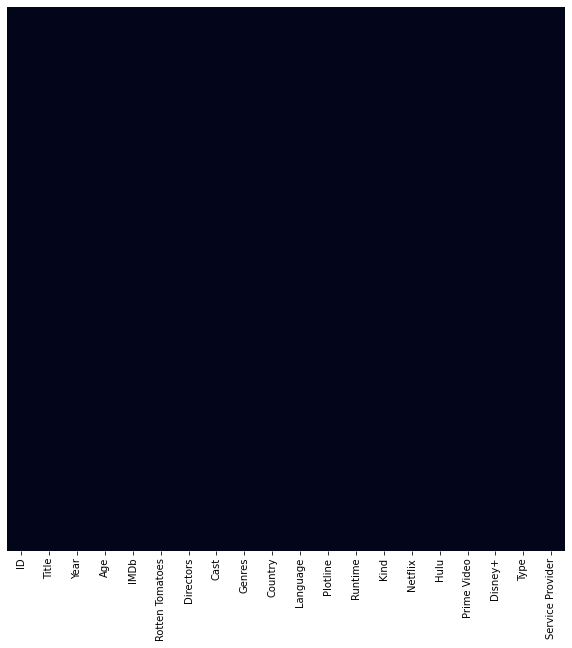

In [10]:
data_investigate(df_movies)

In [11]:
df_movies.head()

ID                           Title  Year Age IMDb Rotten Tomatoes  \
0   1                       Inception  2010  13  8.8              87   
1   2                      The Matrix  1999  16  8.7              88   
2   3          Avengers: Infinity War  2018  13  8.4              85   
3   4              Back to the Future  1985   7  8.5              96   
4   5  The Good, the Bad and the Ugly  1966  16  8.8              97   

                        Directors  \
0               Christopher Nolan   
1  Lana Wachowski,Lilly Wachowski   
2         Anthony Russo,Joe Russo   
3                 Robert Zemeckis   
4                    Sergio Leone   

                                                Cast  \
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
1  Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...   
2  Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...   
3  Michael J. Fox,Christopher Lloyd,Lea Thompson,...   
4  Eli Wallach,Clint Eastwood,Lee Van Cleef,Aldo ...   

                             Genres                                 Country  \
0  Action,Adventure,Sci-Fi,Thriller            United States,United Kingdom   
1                     Action,Sci-Fi                           United States   
2           Action,Adventure,Sci-Fi                           United States   
3           Adventure,Comedy,Sci-Fi                           United States   
4                           Western  Italy,Spain,West Germany,United States   

                  Language                                           Plotline  \
0  English,Japanese,French  Dom Cobb is a skilled thief, the absolute best...   
1                  English  Thomas A. Anderson is a man living two lives. ...   
2                  English  As the Avengers and their allies have continue...   
3                  English  Marty McFly, a typical American teenager of th...   
4                  Italian  Blondie (The Good) (Clint Eastwood) is a profe...   

  Runtime   Kind  Netflix  Hulu  Prime Video  Disney+  Type Service Provider  
0     148  movie        1     0            0        0     0          Netflix  
1     136  movie        1     0            0        0     0          Netflix  
2     149  movie        1     0            0        0     0          Netflix  
3     116  movie        1     0            0        0     0          Netflix  
4     161  movie        1     0            1        0     0          Netflix

In [12]:
df_movies.describe()

ID          Year       Netflix          Hulu   Prime Video  \
count  16923.000000  16923.000000  16923.000000  16923.000000  16923.000000   
mean    8462.000000   2003.211901      0.214915      0.062637      0.727235   
std     4885.393638     20.526532      0.410775      0.242315      0.445394   
min        1.000000   1901.000000      0.000000      0.000000      0.000000   
25%     4231.500000   2001.000000      0.000000      0.000000      0.000000   
50%     8462.000000   2012.000000      0.000000      0.000000      1.000000   
75%    12692.500000   2016.000000      0.000000      0.000000      1.000000   
max    16923.000000   2020.000000      1.000000      1.000000      1.000000   

            Disney+     Type  
count  16923.000000  16923.0  
mean       0.033150      0.0  
std        0.179034      0.0  
min        0.000000      0.0  
25%        0.000000      0.0  
50%        0.000000      0.0  
75%        0.000000      0.0  
max        1.000000      0.0

In [13]:
df_movies.corr()

ID      Year   Netflix      Hulu  Prime Video   Disney+  \
ID           1.000000 -0.217816 -0.644470 -0.129926     0.469301  0.263530   
Year        -0.217816  1.000000  0.256151  0.101337    -0.255578 -0.047258   
Netflix     -0.644470  0.256151  1.000000 -0.118032    -0.745141 -0.089649   
Hulu        -0.129926  0.101337 -0.118032  1.000000    -0.284654 -0.039693   
Prime Video  0.469301 -0.255578 -0.745141 -0.284654     1.000000 -0.289008   
Disney+      0.263530 -0.047258 -0.089649 -0.039693    -0.289008  1.000000   
Type              NaN       NaN       NaN       NaN          NaN       NaN   

             Type  
ID            NaN  
Year          NaN  
Netflix       NaN  
Hulu          NaN  
Prime Video   NaN  
Disney+       NaN  
Type          NaN

In [14]:
# df_movies.sort_values('Year', ascending = True)
# df_movies.sort_values('IMDb', ascending = False)

In [15]:
# df_movies.to_csv(path_or_buf= '/content/drive/MyDrive/Files/updated_ottmovies.csv', index = False)
 
# path = '/content/drive/MyDrive/Files/'
 
# udf_movies = pd.read_csv(path + 'updated_ottmovies.csv')
 
# udf_movies

In [16]:
# df_netflix_movies = df_movies.loc[(df_movies['Netflix'] > 0)]
# df_hulu_movies = df_movies.loc[(df_movies['Hulu'] > 0)]
# df_prime_video_movies = df_movies.loc[(df_movies['Prime Video'] > 0)]
# df_disney_movies = df_movies.loc[(df_movies['Disney+'] > 0)]

In [17]:
df_netflix_only_movies = df_movies[(df_movies['Netflix'] == 1) & (df_movies['Hulu'] == 0) & (df_movies['Prime Video'] == 0 ) & (df_movies['Disney+'] == 0)]
df_hulu_only_movies = df_movies[(df_movies['Netflix'] == 0) & (df_movies['Hulu'] == 1) & (df_movies['Prime Video'] == 0 ) & (df_movies['Disney+'] == 0)]
df_prime_video_only_movies = df_movies[(df_movies['Netflix'] == 0) & (df_movies['Hulu'] == 0) & (df_movies['Prime Video'] == 1 ) & (df_movies['Disney+'] == 0)]
df_disney_only_movies = df_movies[(df_movies['Netflix'] == 0) & (df_movies['Hulu'] == 0) & (df_movies['Prime Video'] == 0 ) & (df_movies['Disney+'] == 1)]

In [18]:
df_movies_casts = df_movies.copy()

In [19]:
df_movies_casts.drop(df_movies_casts.loc[df_movies_casts['Cast'] == "NA"].index, inplace = True)
# df_movies_casts = df_movies_casts[df_movies_casts.Cast != "NA"]
# df_movies_casts['Cast'] = df_movies_casts['Cast'].astype(str)

In [20]:
df_movies_count_casts = df_movies_casts.copy()

In [21]:
df_movies_cast = df_movies_casts.copy()

In [22]:
# Create casts dict where key=name and value = number of casts
 
casts = {}
 
for i in df_movies_count_casts['Cast'].dropna():
    if i != "NA":
        #print(i,len(i.split(',')))
        casts[i] = len(i.split(','))
    else:
        casts[i] = 0
    
# Add this information to our dataframe as a new column
 
df_movies_count_casts['Number of Casts'] = df_movies_count_casts['Cast'].map(casts).astype(int)

In [23]:
df_movies_mixed_casts = df_movies_count_casts.copy()

In [24]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_casts_movies = df_movies_count_casts.loc[df_movies_count_casts['Netflix'] == 1]
hulu_casts_movies = df_movies_count_casts.loc[df_movies_count_casts['Hulu'] == 1]
prime_video_casts_movies = df_movies_count_casts.loc[df_movies_count_casts['Prime Video'] == 1]
disney_casts_movies = df_movies_count_casts.loc[df_movies_count_casts['Disney+'] == 1]

<Figure size 720x720 with 0 Axes>

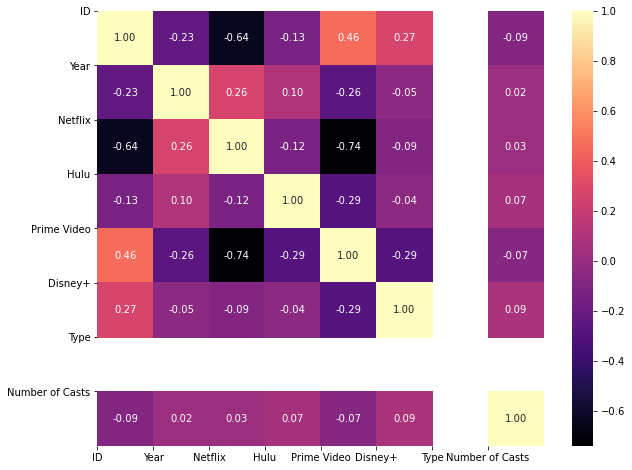

In [25]:
plt.figure(figsize = (10, 10))
corr = df_movies_count_casts.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
# Generate Heat Map, alleast annotations and place floats in map
sns.heatmap(corr, cmap = 'magma', annot = True, fmt = ".2f")
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
# show plot
plt.show()
fig.show()

In [26]:
df_casts_most_movies = df_movies_count_casts.sort_values(by = 'Number of Casts', ascending = False).reset_index()
df_casts_most_movies = df_casts_most_movies.drop(['index'], axis = 1)
# filter = (df_movies_count_casts['Number of Casts'] == (df_movies_count_casts['Number of Casts'].max()))
# df_casts_most_movies = df_movies_count_casts[filter]
 
# mostest_rated_movies = df_movies_count_casts.loc[df_movies_count_casts['Number of Casts'].idxmax()]
 
print('\nMovies with Highest Ever Number of Casts are : \n')
df_casts_most_movies.head(5)


Movies with Highest Ever Number of Casts are : 



ID                        Title  Year Age IMDb Rotten Tomatoes  \
0    380                 Heneral Luna  2015  16  7.5              75   
1  15970  Around the World in 80 Days  2004   0  6.8              32   
2   4624                      7 Boxes  2012  16  7.1              97   
3   4156               Catching Faith  2015  NR  4.8              NA   
4  10904                A Broken Code  2012  NR  5.9              NA   

                             Directors  \
0                        Jerrold Tarog   
1         Michael Anderson,John Farrow   
2  Juan Carlos Maneglia,Tana Schémbori   
3                     John K.D. Graham   
4         Josh Webber,Michael Girgenti   

                                                Cast  \
0  John Arcilla,Arron Villaflor,Mon Confiado,Bing...   
1  Cantinflas,Finlay Currie,Robert Morley,Ronald ...   
2  Celso Franco,Víctor Sosa,Lali Gonzalez,Nico Ga...   
3  Lorena Segura York,Garrett Westton,Bill Engval...   
4  Michael Girgenti,Josh Webber,Bill T. Williams,...   

                                   Genres         Country  ...  \
0            Action,Biography,History,War     Philippines  ...   
1         Adventure,Comedy,Family,Romance   United States  ...   
2  Adventure,Crime,Drama,Mystery,Thriller  Paraguay,Spain  ...   
3                      Drama,Family,Sport   United States  ...   
4                    Crime,Drama,Thriller   United States  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Set during the Philippine-American war, Henera...     118  movie       1   
1  Race car driver, Jim Douglas goes to Monte Car...     167  movie       0   
2  It's Friday night in Asunción, Paraguay and th...     105  movie       0   
3  From the outside, Alexa has the perfect life. ...      88  movie       0   
4  Each morning, Yusef, a doting father-of-one, h...      90  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Casts  
0     0            0        0     0           Netflix            1400  
1     0            0        1     0           Disney+            1304  
2     0            1        0     0       Prime Video             689  
3     1            1        0     0       Prime Video             491  
4     0            1        0     0       Prime Video             476  

[5 rows x 21 columns]

In [27]:
fig = px.bar(y = df_casts_most_movies['Title'][:15],
             x = df_casts_most_movies['Number of Casts'][:15], 
             color = df_casts_most_movies['Number of Casts'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Casts'},
             title  = 'Movies with Highest Number of Casts : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [28]:
df_casts_least_movies = df_movies_count_casts.sort_values(by = 'Number of Casts', ascending = True).reset_index()
df_casts_least_movies = df_casts_least_movies.drop(['index'], axis = 1)
# filter = (df_movies_count_casts['Number of Casts'] == (df_movies_count_casts['Number of Casts'].min()))
# df_casts_least_movies = df_movies_count_casts[filter]

print('\nMovies with Lowest Ever Number of Casts are : \n')
df_casts_least_movies.head(5)


Movies with Lowest Ever Number of Casts are : 



ID                              Title  Year Age IMDb Rotten Tomatoes  \
0   2004          Ryan Hamilton: Happy Face  2017  NR  7.3              NA   
1   2979         Tim Allen: Rewires America  1991   7  5.9              NA   
2  11983              Dennis Miller: All In  2006  18  5.8              NA   
3   8883  Azorian: The Raising of the K-129  2011   7  7.3              NA   
4   1425         Jimmy Carr: Funny Business  2016  NR  7.2              NA   

       Directors           Cast              Genres         Country  ...  \
0   Marcus Raboy  Ryan Hamilton  Documentary,Comedy   United States  ...   
1    Ellen Brown      Tim Allen  Documentary,Comedy   United States  ...   
2   James Yukich  Dennis Miller              Comedy   United States  ...   
3  Michael White   Nick Jackson         Documentary         Austria  ...   
4     Sam Wrench     Jimmy Carr              Comedy  United Kingdom  ...   

                                            Plotline Runtime   Kind Netflix  \
0                                                 NA      56  movie       1   
1                                                 NA      30  movie       1   
2                                                 NA      57  movie       0   
3  Georgina is an ambitious young London professi...     105  movie       0   
4                                                 NA      62  movie       1   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Casts  
0     0            0        0     0           Netflix               1  
1     0            1        0     0           Netflix               1  
2     0            1        0     0       Prime Video               1  
3     0            1        0     0       Prime Video               1  
4     0            0        0     0           Netflix               1  

[5 rows x 21 columns]

In [29]:
fig = px.bar(y = df_casts_least_movies['Title'][:15],
             x = df_casts_least_movies['Number of Casts'][:15], 
             color = df_casts_least_movies['Number of Casts'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Casts'},
             title  = 'Movies with Lowest Number of Casts : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [30]:
print(f'''
      Total '{df_movies_count_casts['Number of Casts'].unique().shape[0]}' unique Number of Casts s were Given, They were Like this,\n
      
      {df_movies_count_casts.sort_values(by = 'Number of Casts', ascending = False)['Number of Casts'].unique()}\n
 
      The Highest Number of Casts Ever Any Movie Got is '{df_casts_most_movies['Title'][0]}' : '{df_casts_most_movies['Number of Casts'].max()}'\n
 
      The Lowest Number of Casts Ever Any Movie Got is '{df_casts_least_movies['Title'][0]}' : '{df_casts_least_movies['Number of Casts'].min()}'\n
      ''')


      Total '242' unique Number of Casts s were Given, They were Like this,

      
      [1400 1304  689  491  476  472  452  450  449  386  354  325  303  302
  299  295  294  292  281  268  265  260  256  254  253  251  247  245
  241  240  238  237  236  235  233  231  230  227  224  221  217  215
  213  207  206  205  204  203  202  200  199  198  196  195  194  193
  192  191  190  189  188  186  184  183  182  180  179  178  177  175
  174  173  172  171  170  169  168  166  165  164  163  162  161  160
  159  157  156  155  154  153  152  151  150  149  148  147  146  145
  144  143  142  141  140  139  138  137  136  135  134  133  132  131
  130  129  128  127  126  125  124  123  122  121  120  119  118  117
  116  115  114  113  112  111  110  109  108  107  106  105  104  103
  102  101  100   99   98   97   96   95   94   93   92   91   90   89
   88   87   86   85   84   83   82   81   80   79   78   77   76   75
   74   73   72   71   70   69   68   67   66   65   64  

In [31]:
netflix_casts_most_movies = df_casts_most_movies.loc[df_casts_most_movies['Netflix']==1].reset_index()
netflix_casts_most_movies = netflix_casts_most_movies.drop(['index'], axis = 1)
 
netflix_casts_least_movies = df_casts_least_movies.loc[df_casts_least_movies['Netflix']==1].reset_index()
netflix_casts_least_movies = netflix_casts_least_movies.drop(['index'], axis = 1)
 
netflix_casts_most_movies.head(5)

ID                               Title  Year Age IMDb Rotten Tomatoes  \
0   380                        Heneral Luna  2015  16  7.5              75   
1    29                        The Irishman  2019  16  7.8              62   
2  2785  Bring It On: Worldwide #Cheersmack  2017  13  4.3              NA   
3  1929                         Like Arrows  2018  NR  6.5              NA   
4  1326                        Sandy Wexler  2017  16  5.2              27   

         Directors                                               Cast  \
0    Jerrold Tarog  John Arcilla,Arron Villaflor,Mon Confiado,Bing...   
1  Martin Scorsese  Robert De Niro,Al Pacino,Joe Pesci,Harvey Keit...   
2   Robert Adetuyi  Stephan Benson,Kai Luke Brummer,Sophie de Bruy...   
3    Kevin Peeples  Micah Lynn Hanson,Alan Powell,Elizabeth Becka,...   
4     Steven Brill  Adam Sandler,Jennifer Hudson,Kevin James,Colin...   

                         Genres        Country  ...  \
0  Action,Biography,History,War    Philippines  ...   
1         Biography,Crime,Drama  United States  ...   
2          Comedy,Romance,Sport  United States  ...   
3                         Drama  United States  ...   
4                        Comedy  United States  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Set during the Philippine-American war, Henera...     118  movie       1   
1  Frank "The Irishman" Sheeran is a man with a l...     209  movie       1   
2  Vivica A. Fox makes her Bring It On debut as C...      95  movie       1   
3                                                 NA     100  movie       1   
4  Sandy Wexler (Adam Sandler) is a talent manage...     130  movie       1   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Casts  
0     0            0        0     0           Netflix            1400  
1     0            0        0     0           Netflix             472  
2     0            0        0     0           Netflix             450  
3     0            0        0     0           Netflix             303  
4     0            0        0     0           Netflix             260  

[5 rows x 21 columns]

In [32]:
fig = px.bar(y = netflix_casts_most_movies['Title'][:15],
             x = netflix_casts_most_movies['Number of Casts'][:15], 
             color = netflix_casts_most_movies['Number of Casts'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Casts'},
             title  = 'Movies with Highest Number of Casts : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [33]:
fig = px.bar(y = netflix_casts_least_movies['Title'][:15],
             x = netflix_casts_least_movies['Number of Casts'][:15], 
             color = netflix_casts_least_movies['Number of Casts'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Casts'},
             title  = 'Movies with Lowest Number of Casts : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [34]:
hulu_casts_most_movies = df_casts_most_movies.loc[df_casts_most_movies['Hulu']==1].reset_index()
hulu_casts_most_movies = hulu_casts_most_movies.drop(['index'], axis = 1)
 
hulu_casts_least_movies = df_casts_least_movies.loc[df_casts_least_movies['Hulu']==1].reset_index()
hulu_casts_least_movies = hulu_casts_least_movies.drop(['index'], axis = 1)
 
hulu_casts_most_movies.head(5)

ID                                      Title  Year Age IMDb  \
0  4156                             Catching Faith  2015  NR  4.8   
1  3510                                   Creed II  2018  13  7.1   
2  3460                            The Dark Knight  2008  13    9   
3  3709                             Tom of Finland  2017  NR  6.8   
4  3802  C.S.A.: The Confederate States of America  2005  13  6.4   

  Rotten Tomatoes          Directors  \
0              NA   John K.D. Graham   
1              83   Steven Caple Jr.   
2              87  Christopher Nolan   
3              84     Dome Karukoski   
4              80     Kevin Willmott   

                                                Cast  \
0  Lorena Segura York,Garrett Westton,Bill Engval...   
1  Michael B. Jordan,Sylvester Stallone,Tessa Tho...   
2  Christian Bale,Heath Ledger,Aaron Eckhart,Mich...   
3  Pekka Strang,Seumas F. Sargent,Chris Myland,Al...   
4  Greg Kirsch,Renee Patrick,Molly Graham,William...   

                        Genres  \
0           Drama,Family,Sport   
1                  Drama,Sport   
2  Action,Crime,Drama,Thriller   
3              Biography,Drama   
4             Comedy,Drama,War   

                                             Country  ...  \
0                                      United States  ...   
1                                      United States  ...   
2                       United States,United Kingdom  ...   
3  Finland,Sweden,Denmark,Germany,Iceland,United ...  ...   
4                                      United States  ...   

                                            Plotline Runtime   Kind Netflix  \
0  From the outside, Alexa has the perfect life. ...      88  movie       0   
1  Years after Adonis Creed made a name for himse...     130  movie       0   
2  Set within a year after the events of Batman B...     152  movie       0   
3  Touko Laaksonen, a decorated officer, returns ...     117  movie       0   
4  Set in an contemporary alternative world where...      89  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Casts  
0     1            1        0     0       Prime Video             491  
1     1            1        0     0       Prime Video             299  
2     1            0        0     0              Hulu             241  
3     1            0        0     0              Hulu             233  
4     1            0        0     0              Hulu             224  

[5 rows x 21 columns]

In [35]:
fig = px.bar(y = hulu_casts_most_movies['Title'][:15],
             x = hulu_casts_most_movies['Number of Casts'][:15], 
             color = hulu_casts_most_movies['Number of Casts'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Casts'},
             title  = 'Movies with Highest Number of Casts : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [36]:
fig = px.bar(y = hulu_casts_least_movies['Title'][:15],
             x = hulu_casts_least_movies['Number of Casts'][:15], 
             color = hulu_casts_least_movies['Number of Casts'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Casts'},
             title  = 'Movies with Lowest Number of Casts : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [37]:
prime_video_casts_most_movies = df_casts_most_movies.loc[df_casts_most_movies['Prime Video']==1].reset_index()
prime_video_casts_most_movies = prime_video_casts_most_movies.drop(['index'], axis = 1)
 
prime_video_casts_least_movies = df_casts_least_movies.loc[df_casts_least_movies['Prime Video']==1].reset_index()
prime_video_casts_least_movies = prime_video_casts_least_movies.drop(['index'], axis = 1)
 
prime_video_casts_most_movies.head(5)

ID                             Title  Year Age IMDb Rotten Tomatoes  \
0   4624                           7 Boxes  2012  16  7.1              97   
1   4156                    Catching Faith  2015  NR  4.8              NA   
2  10904                     A Broken Code  2012  NR  5.9              NA   
3   6448       Sharknado 2: The Second One  2014  16    4              61   
4   6592  Angry Video Game Nerd: The Movie  2014  NR  5.6              NA   

                             Directors  \
0  Juan Carlos Maneglia,Tana Schémbori   
1                     John K.D. Graham   
2         Josh Webber,Michael Girgenti   
3                  Anthony C. Ferrante   
4               Kevin Finn,James Rolfe   

                                                Cast  \
0  Celso Franco,Víctor Sosa,Lali Gonzalez,Nico Ga...   
1  Lorena Segura York,Garrett Westton,Bill Engval...   
2  Michael Girgenti,Josh Webber,Bill T. Williams,...   
3  Ian Ziering,Tara Reid,Vivica A. Fox,Mark McGra...   
4  James Rolfe,Jeremy Suarez,Sarah Glendening,Bob...   

                                           Genres         Country  ...  \
0          Adventure,Crime,Drama,Mystery,Thriller  Paraguay,Spain  ...   
1                              Drama,Family,Sport   United States  ...   
2                            Crime,Drama,Thriller   United States  ...   
3  Action,Adventure,Comedy,Horror,Sci-Fi,Thriller   United States  ...   
4                         Adventure,Comedy,Sci-Fi   United States  ...   

                                            Plotline Runtime   Kind Netflix  \
0  It's Friday night in Asunción, Paraguay and th...     105  movie       0   
1  From the outside, Alexa has the perfect life. ...      88  movie       0   
2  Each morning, Yusef, a doting father-of-one, h...      90  movie       0   
3  It's the closing night at the last drive-in th...      95  movie       0   
4  Roger Mortis and Doug Bigelow are cops that ar...     115  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Casts  
0     0            1        0     0       Prime Video             689  
1     1            1        0     0       Prime Video             491  
2     0            1        0     0       Prime Video             476  
3     0            1        0     0       Prime Video             452  
4     0            1        0     0       Prime Video             449  

[5 rows x 21 columns]

In [38]:
fig = px.bar(y = prime_video_casts_most_movies['Title'][:15],
             x = prime_video_casts_most_movies['Number of Casts'][:15], 
             color = prime_video_casts_most_movies['Number of Casts'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Casts'},
             title  = 'Movies with Highest Number of Casts : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [39]:
fig = px.bar(y = prime_video_casts_least_movies['Title'][:15],
             x = prime_video_casts_least_movies['Number of Casts'][:15], 
             color = prime_video_casts_least_movies['Number of Casts'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Casts'},
             title  = 'Movies with Lowest Number of Casts : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [40]:
disney_casts_most_movies = df_casts_most_movies.loc[df_casts_most_movies['Disney+']==1].reset_index()
disney_casts_most_movies = disney_casts_most_movies.drop(['index'], axis = 1)
 
disney_casts_least_movies = df_casts_least_movies.loc[df_casts_least_movies['Disney+']==1].reset_index()
disney_casts_least_movies = disney_casts_least_movies.drop(['index'], axis = 1)
 
disney_casts_most_movies.head(5)

ID                                Title  Year Age IMDb Rotten Tomatoes  \
0  15970          Around the World in 80 Days  2004   0  6.8              32   
1  15875                  Muppets Most Wanted  2014   7  6.4              80   
2  15773                           Iron Man 3  2013  13  7.1              79   
3  15750  Captain America: The Winter Soldier  2014  13  7.7              90   
4  15743        Star Wars: Return of the Jedi  1983   7  8.3              82   

                      Directors  \
0  Michael Anderson,John Farrow   
1                   James Bobin   
2                   Shane Black   
3       Anthony Russo,Joe Russo   
4              Richard Marquand   

                                                Cast  \
0  Cantinflas,Finlay Currie,Robert Morley,Ronald ...   
1  Ricky Gervais,Ty Burrell,Tina Fey,Steve Whitmi...   
2  Robert Downey Jr.,Gwyneth Paltrow,Don Cheadle,...   
3  Chris Evans,Samuel L. Jackson,Scarlett Johanss...   
4  Mark Hamill,Harrison Ford,Carrie Fisher,Billy ...   

                                          Genres  \
0                Adventure,Comedy,Family,Romance   
1  Adventure,Comedy,Crime,Family,Musical,Mystery   
2                        Action,Adventure,Sci-Fi   
3               Action,Adventure,Sci-Fi,Thriller   
4                Action,Adventure,Fantasy,Sci-Fi   

                        Country  ...  \
0                 United States  ...   
1  United States,United Kingdom  ...   
2                 United States  ...   
3                 United States  ...   
4  United States,United Kingdom  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Race car driver, Jim Douglas goes to Monte Car...     167  movie       0   
1  Three out of work silent movie actors are acci...     107  movie       0   
2  Disney animators set pictures to Western class...     130  movie       0   
3  Jack Skellington, the pumpkin king of Hallowee...     136  movie       0   
4  When a devastating event befalls the city of S...     131  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Casts  
0     0            0        1     0           Disney+            1304  
1     0            0        1     0           Disney+             302  
2     0            0        1     0           Disney+             268  
3     0            0        1     0           Disney+             245  
4     0            0        1     0           Disney+             217  

[5 rows x 21 columns]

In [41]:
fig = px.bar(y = disney_casts_most_movies['Title'][:15],
             x = disney_casts_most_movies['Number of Casts'][:15], 
             color = disney_casts_most_movies['Number of Casts'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Casts'},
             title  = 'Movies with Highest Number of Casts : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [42]:
fig = px.bar(y = disney_casts_least_movies['Title'][:15],
             x = disney_casts_least_movies['Number of Casts'][:15], 
             color = disney_casts_least_movies['Number of Casts'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Casts'},
             title  = 'Movies with Lowest Number of Casts : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [43]:
print(f'''
      The Movie with Highest Number of Casts Ever Got is '{df_casts_most_movies['Title'][0]}' : '{df_casts_most_movies['Number of Casts'].max()}'\n
      The Movie with Lowest Number of Casts Ever Got is '{df_casts_least_movies['Title'][0]}' : '{df_casts_least_movies['Number of Casts'].min()}'\n
      
      The Movie with Highest Number of Casts on 'Netflix' is '{netflix_casts_most_movies['Title'][0]}' : '{netflix_casts_most_movies['Number of Casts'].max()}'\n
      The Movie with Lowest Number of Casts on 'Netflix' is '{netflix_casts_least_movies['Title'][0]}' : '{netflix_casts_least_movies['Number of Casts'].min()}'\n
      
      The Movie with Highest Number of Casts on 'Hulu' is '{hulu_casts_most_movies['Title'][0]}' : '{hulu_casts_most_movies['Number of Casts'].max()}'\n
      The Movie with Lowest Number of Casts on 'Hulu' is '{hulu_casts_least_movies['Title'][0]}' : '{hulu_casts_least_movies['Number of Casts'].min()}'\n
      
      The Movie with Highest Number of Casts on 'Prime Video' is '{prime_video_casts_most_movies['Title'][0]}' : '{prime_video_casts_most_movies['Number of Casts'].max()}'\n
      The Movie with Lowest Number of Casts on 'Prime Video' is '{prime_video_casts_least_movies['Title'][0]}' : '{prime_video_casts_least_movies['Number of Casts'].min()}'\n
      
      The Movie with Highest Number of Casts on 'Disney+' is '{disney_casts_most_movies['Title'][0]}' : '{disney_casts_most_movies['Number of Casts'].max()}'\n
      The Movie with Lowest Number of Casts on 'Disney+' is '{disney_casts_least_movies['Title'][0]}' : '{disney_casts_least_movies['Number of Casts'].min()}'\n 
      ''')


      The Movie with Highest Number of Casts Ever Got is 'Heneral Luna' : '1400'

      The Movie with Lowest Number of Casts Ever Got is 'Ryan Hamilton: Happy Face' : '1'

      
      The Movie with Highest Number of Casts on 'Netflix' is 'Heneral Luna' : '1400'

      The Movie with Lowest Number of Casts on 'Netflix' is 'Ryan Hamilton: Happy Face' : '1'

      
      The Movie with Highest Number of Casts on 'Hulu' is 'Catching Faith' : '491'

      The Movie with Lowest Number of Casts on 'Hulu' is 'Alien Contact' : '1'

      
      The Movie with Highest Number of Casts on 'Prime Video' is '7 Boxes' : '689'

      The Movie with Lowest Number of Casts on 'Prime Video' is 'Tim Allen: Rewires America' : '1'

      
      The Movie with Highest Number of Casts on 'Disney+' is 'Around the World in 80 Days' : '1304'

      The Movie with Lowest Number of Casts on 'Disney+' is 'The African Lion' : '1'
 
      


In [44]:
print(f'''
      Accross All Platforms the Average Number of Casts is '{round(df_movies_count_casts['Number of Casts'].mean(), ndigits = 2)}'\n
      The Average Number of Casts on 'Netflix' is '{round(netflix_casts_movies['Number of Casts'].mean(), ndigits = 2)}'\n
      The Average Number of Casts on 'Hulu' is '{round(hulu_casts_movies['Number of Casts'].mean(), ndigits = 2)}'\n
      The Average Number of Casts on 'Prime Video' is '{round(prime_video_casts_movies['Number of Casts'].mean(), ndigits = 2)}'\n
      The Average Number of Casts on 'Disney+' is '{round(disney_casts_movies['Number of Casts'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Number of Casts is '32.64'

      The Average Number of Casts on 'Netflix' is '34.47'

      The Average Number of Casts on 'Hulu' is '41.65'

      The Average Number of Casts on 'Prime Video' is '31.11'

      The Average Number of Casts on 'Disney+' is '49.06'
 
      


In [45]:
print(f'''
      Accross All Platforms Total Count of Cast is '{df_movies_count_casts['Number of Casts'].max()}'\n
      Total Count of Cast on 'Netflix' is '{netflix_casts_movies['Number of Casts'].max()}'\n
      Total Count of Cast on 'Hulu' is '{hulu_casts_movies['Number of Casts'].max()}'\n
      Total Count of Cast on 'Prime Video' is '{prime_video_casts_movies['Number of Casts'].max()}'\n
      Total Count of Cast on 'Disney+' is '{disney_casts_movies['Number of Casts'].max()}'\n 
      ''')


      Accross All Platforms Total Count of Cast is '1400'

      Total Count of Cast on 'Netflix' is '1400'

      Total Count of Cast on 'Hulu' is '491'

      Total Count of Cast on 'Prime Video' is '689'

      Total Count of Cast on 'Disney+' is '1304'
 
      


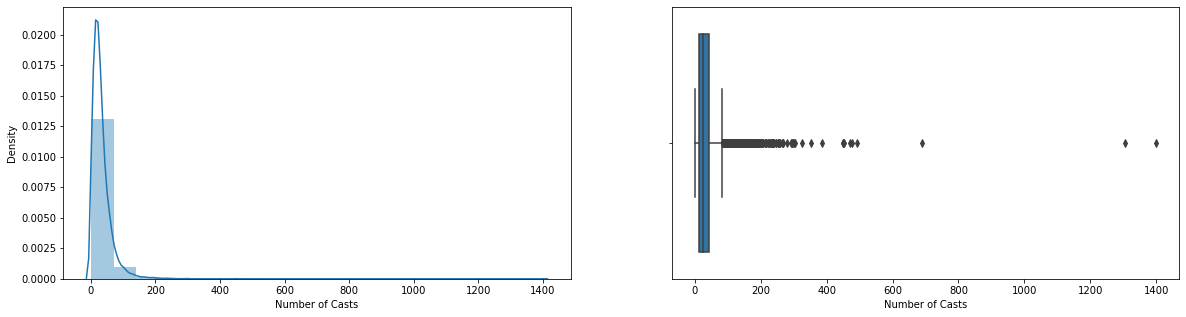

In [46]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(df_movies_count_casts['Number of Casts'],bins = 20, kde = True, ax = ax[0])
sns.boxplot(df_movies_count_casts['Number of Casts'], ax = ax[1])
plt.show()

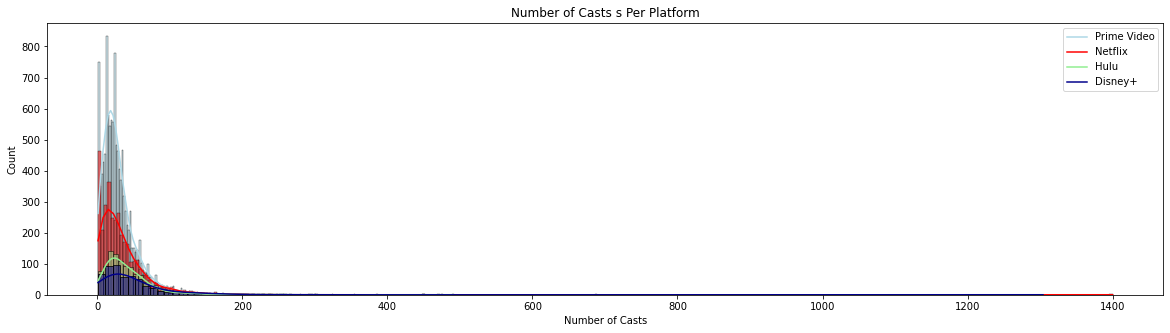

In [47]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Number of Casts s Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.histplot(prime_video_casts_movies['Number of Casts'], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_casts_movies['Number of Casts'], color = 'red', legend = True, kde = True)
sns.histplot(hulu_casts_movies['Number of Casts'], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_casts_movies['Number of Casts'], color = 'darkblue', legend = True, kde = True) 
 
# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [48]:
df_lan = df_movies_cast['Cast'].str.split(',').apply(pd.Series).stack()
del df_movies_cast['Cast']
df_lan.index = df_lan.index.droplevel(-1)
df_lan.name = 'Cast'
df_movies_cast = df_movies_cast.join(df_lan)
df_movies_cast.drop_duplicates(inplace = True)

In [49]:
df_movies_cast.head(5)

ID      Title  Year Age IMDb Rotten Tomatoes          Directors  \
0   1  Inception  2010  13  8.8              87  Christopher Nolan   
0   1  Inception  2010  13  8.8              87  Christopher Nolan   
0   1  Inception  2010  13  8.8              87  Christopher Nolan   
0   1  Inception  2010  13  8.8              87  Christopher Nolan   
0   1  Inception  2010  13  8.8              87  Christopher Nolan   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   

                  Language                                           Plotline  \
0  English,Japanese,French  Dom Cobb is a skilled thief, the absolute best...   
0  English,Japanese,French  Dom Cobb is a skilled thief, the absolute best...   
0  English,Japanese,French  Dom Cobb is a skilled thief, the absolute best...   
0  English,Japanese,French  Dom Cobb is a skilled thief, the absolute best...   
0  English,Japanese,French  Dom Cobb is a skilled thief, the absolute best...   

  Runtime   Kind  Netflix  Hulu  Prime Video  Disney+  Type Service Provider  \
0     148  movie        1     0            0        0     0          Netflix   
0     148  movie        1     0            0        0     0          Netflix   
0     148  movie        1     0            0        0     0          Netflix   
0     148  movie        1     0            0        0     0          Netflix   
0     148  movie        1     0            0        0     0          Netflix   

                   Cast  
0     Leonardo DiCaprio  
0  Joseph Gordon-Levitt  
0           Elliot Page  
0             Tom Hardy  
0          Ken Watanabe

In [50]:
cast_count = df_movies_cast.groupby('Cast')['Title'].count()
cast_movies = df_movies_cast.groupby('Cast')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
cast_data_movies = pd.concat([cast_count, cast_movies], axis = 1).reset_index().rename(columns = {'Title' : 'Movies Count'})
cast_data_movies = cast_data_movies.sort_values(by = 'Movies Count', ascending = False)

In [51]:
# Cast with Movies Counts - All Platforms Combined
cast_data_movies.sort_values(by = 'Movies Count', ascending = False)[:10]

Cast  Movies Count  Netflix  Hulu  Prime Video  Disney+
99089        Frank Welker            84       16    14           16       42
116679        Herman Hack            74        0     0           72        2
13322    Amitabh Bachchan            67       24     0           53        0
256998      Ronald Reagan            66       19     8           40        0
264023  Samuel L. Jackson            63       15     6           32       18
22172         Anupam Kher            61       27     2           36        0
3093         Adolf Hitler            61       14     5           45        3
140977       Jim Cummings            60       11     7            8       35
91411        Eric Roberts            58        2     2           54        0
28049        Barack Obama            57       23     6           27        2

In [52]:
fig = px.bar(x = cast_data_movies['Cast'][:50],
             y = cast_data_movies['Movies Count'][:50], 
             color = cast_data_movies['Movies Count'][:50],
             color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Cast', 'y' : 'Movies Count'},
             title  = 'Major Casts : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [53]:
df_cast_high_movies = cast_data_movies.sort_values(by = 'Movies Count', ascending = False).reset_index()
df_cast_high_movies = df_cast_high_movies.drop(['index'], axis = 1)
# filter = (cast_data_movies['Movies Count'] == (cast_data_movies['Movies Count'].max()))
# df_cast_high_movies = cast_data_movies[filter]
 
# highest_rated_movies = cast_data_movies.loc[cast_data_movies['Movies Count'].idxmax()]
 
print('\nCast with Highest Ever Movies Count are : All Platforms Combined\n')
df_cast_high_movies.head(5)


Cast with Highest Ever Movies Count are : All Platforms Combined



Cast  Movies Count  Netflix  Hulu  Prime Video  Disney+
0       Frank Welker            84       16    14           16       42
1        Herman Hack            74        0     0           72        2
2   Amitabh Bachchan            67       24     0           53        0
3      Ronald Reagan            66       19     8           40        0
4  Samuel L. Jackson            63       15     6           32       18

In [54]:
fig = px.bar(y = df_cast_high_movies['Cast'][:15],
             x = df_cast_high_movies['Movies Count'][:15], 
             color = df_cast_high_movies['Movies Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Cast', 'x' : 'Movies Count'},
             title  = 'Cast with Highest Movies : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [55]:
df_cast_low_movies = cast_data_movies.sort_values(by = 'Movies Count', ascending = True).reset_index()
df_cast_low_movies = df_cast_low_movies.drop(['index'], axis = 1)
# filter = (cast_data_movies['Movies Count'] == (cast_data_movies['Movies Count'].min()))
# df_cast_low_movies = cast_data_movies[filter]

print('\nCast with Lowest Ever Movies Count are : All Platforms Combined\n')
df_cast_low_movies.head(5)


Cast with Lowest Ever Movies Count are : All Platforms Combined



Cast  Movies Count  Netflix  Hulu  Prime Video  Disney+
0   Oliver Lewis             1        0     0            1        0
1     Dave Parks             1        0     0            1        0
2  Dave Paquitte             1        0     0            1        0
3   Dave Padayao             1        1     0            0        0
4  Dave Osterman             1        0     0            1        0

In [56]:
fig = px.bar(y = df_cast_low_movies['Cast'][:15],
             x = df_cast_low_movies['Movies Count'][:15], 
             color = df_cast_low_movies['Movies Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Cast', 'x' : 'Movies Count'},
             title  = 'Cast with Lowest Movies Count : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [57]:
print(f'''
      Total '{cast_data_movies['Cast'].unique().shape[0]}' unique Cast Count s were Given, They were Like this,\n
      
      {cast_data_movies.sort_values(by = 'Movies Count', ascending = False)['Cast'].unique()[:5]}\n
 
      The Highest Ever Movies Count Ever Any Movie Got is '{df_cast_high_movies['Cast'][0]}' : '{df_cast_high_movies['Movies Count'].max()}'\n
 
      The Lowest Ever Movies Count Ever Any Movie Got is '{df_cast_low_movies['Cast'][0]}' : '{df_cast_low_movies['Movies Count'].min()}'\n
      ''')


      Total '315871' unique Cast Count s were Given, They were Like this,

      
      ['Frank Welker' 'Herman Hack' 'Amitabh Bachchan' 'Ronald Reagan'
 'Samuel L. Jackson']

 
      The Highest Ever Movies Count Ever Any Movie Got is 'Frank Welker' : '84'

 
      The Lowest Ever Movies Count Ever Any Movie Got is 'Oliver Lewis' : '1'

      


In [58]:
fig = px.pie(cast_data_movies[:10], names = 'Cast', values = 'Movies Count', color_discrete_sequence = px.colors.sequential.Teal)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label', title = 'Movies Count based on Cast')
fig.show()

In [59]:
# netflix_cast_movies = cast_data_movies[cast_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_cast_movies = netflix_cast_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
netflix_cast_high_movies = df_cast_high_movies.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_cast_high_movies = netflix_cast_high_movies.drop(['index'], axis = 1)
 
netflix_cast_low_movies = df_cast_high_movies.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_cast_low_movies = netflix_cast_low_movies.drop(['index'], axis = 1)
 
netflix_cast_high_movies.head(5)

Cast  Movies Count  Netflix  Hulu  Prime Video  Disney+
0    Shah Rukh Khan            49       30     0           21        0
1       Anupam Kher            61       27     2           36        0
2  Amitabh Bachchan            67       24     0           53        0
3   Fred Tatasciore            45       24     5            8       11
4      Paresh Rawal            43       23     1           25        0

In [60]:
fig = px.bar(x = netflix_cast_high_movies['Cast'][:15],
             y = netflix_cast_high_movies['Netflix'][:15], 
             color = netflix_cast_high_movies['Netflix'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Cast', 'x' : 'Movies Count'},
             title  = 'Cast with Highest Movies : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [61]:
# hulu_cast_movies = cast_data_movies[cast_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_cast_movies = hulu_cast_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
hulu_cast_high_movies = df_cast_high_movies.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_cast_high_movies = hulu_cast_high_movies.drop(['index'], axis = 1)
 
hulu_cast_low_movies = df_cast_high_movies.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_cast_low_movies = hulu_cast_low_movies.drop(['index'], axis = 1)
 
hulu_cast_high_movies.head(5)

Cast  Movies Count  Netflix  Hulu  Prime Video  Disney+
0    Frank Welker            84       16    14           16       42
1    Nicolas Cage            37       11     9           18        2
2     Liam Neeson            27        6     9           11        6
3      Bill Nighy            24        6     9           12        3
4  Todd Haberkorn            23       11     8            6        0

In [62]:
fig = px.bar(x = hulu_cast_high_movies['Cast'][:15],
             y = hulu_cast_high_movies['Hulu'][:15], 
             color = hulu_cast_high_movies['Hulu'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Cast', 'x' : 'Movies Count'},
             title  = 'Cast with Highest Movies : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [63]:
# prime_video_cast_movies = cast_data_movies[cast_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_cast_movies = prime_video_cast_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)
 
prime_video_cast_high_movies = df_cast_high_movies.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_cast_high_movies = prime_video_cast_high_movies.drop(['index'], axis = 1)
 
prime_video_cast_low_movies = df_cast_high_movies.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_cast_low_movies = prime_video_cast_low_movies.drop(['index'], axis = 1)
 
prime_video_cast_high_movies.head(5)

Cast  Movies Count  Netflix  Hulu  Prime Video  Disney+
0           Herman Hack            74        0     0           72        2
1        George Morrell            56        0     0           56        0
2          Eric Roberts            58        2     2           54        0
3      Amitabh Bachchan            67       24     0           53        0
4  George 'Gabby' Hayes            47        0     0           47        0

In [64]:
fig = px.bar(x = prime_video_cast_high_movies['Cast'][:15],
             y = prime_video_cast_high_movies['Prime Video'][:15], 
             color = prime_video_cast_high_movies['Prime Video'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Cast', 'x' : 'Movies Count'},
             title  = 'Cast with Highest Movies : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [65]:
# disney_cast_movies = cast_data_movies[cast_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_cast_movies = disney_cast_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)
 
disney_cast_high_movies = df_cast_high_movies.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_cast_high_movies = disney_cast_high_movies.drop(['index'], axis = 1)
 
disney_cast_low_movies = df_cast_high_movies.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_cast_low_movies = disney_cast_low_movies.drop(['index'], axis = 1)
 
disney_cast_high_movies.head(5)

Cast  Movies Count  Netflix  Hulu  Prime Video  Disney+
0  Frank Welker            84       16    14           16       42
1  Jeff Bennett            53        8     6            4       36
2  Jim Cummings            60       11     7            8       35
3   Kath Soucie            38        4     4            6       26
4      Stan Lee            44        5     2           16       26

In [66]:
fig = px.bar(x = disney_cast_high_movies['Cast'][:15],
             y = disney_cast_high_movies['Disney+'][:15], 
             color = disney_cast_high_movies['Disney+'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Cast', 'x' : 'Movies Count'},
             title  = 'Cast with Highest Movies : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

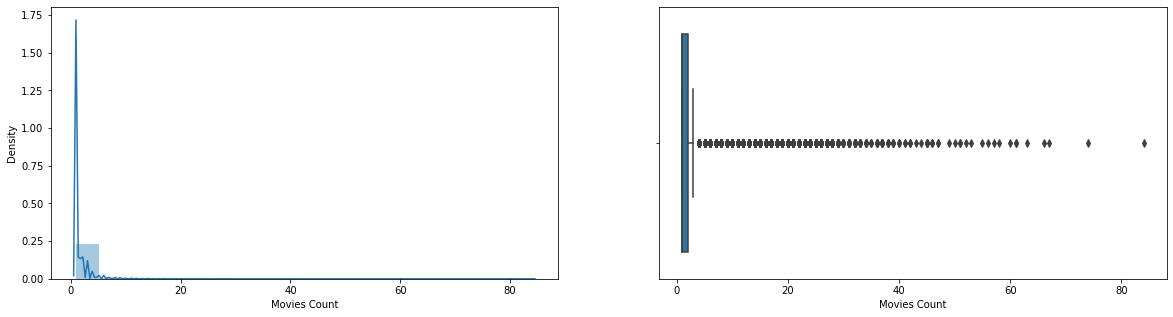

In [67]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(cast_data_movies['Movies Count'], bins = 20, kde = True, ax = ax[0])
sns.boxplot(cast_data_movies['Movies Count'], ax = ax[1])
plt.show()

In [68]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_cast_movies = cast_data_movies[cast_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_cast_movies = netflix_cast_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

hulu_cast_movies = cast_data_movies[cast_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_cast_movies = hulu_cast_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

prime_video_cast_movies = cast_data_movies[cast_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_cast_movies = prime_video_cast_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)

disney_cast_movies = cast_data_movies[cast_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_cast_movies = disney_cast_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)

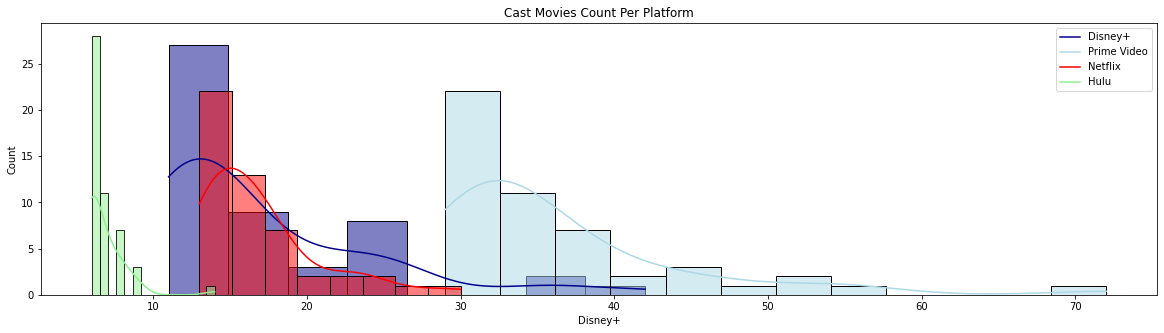

In [69]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Cast Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(disney_cast_movies['Disney+'][:50], color = 'darkblue', legend = True, kde = True)  
sns.histplot(prime_video_cast_movies['Prime Video'][:50], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_cast_movies['Netflix'][:50], color = 'red', legend = True, kde = True)
sns.histplot(hulu_cast_movies['Hulu'][:50], color = 'lightgreen', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Disney+', 'Prime Video', 'Netflix', 'Hulu'])
plt.show()

In [70]:
print(f'''
      The Cast with Highest Movies Count Ever Got is '{df_cast_high_movies['Cast'][0]}' : '{df_cast_high_movies['Movies Count'].max()}'\n
      The Cast with Lowest Movies Count Ever Got is '{df_cast_low_movies['Cast'][0]}' : '{df_cast_low_movies['Movies Count'].min()}'\n
      
      The Cast with Highest Movies Count on 'Netflix' is '{netflix_cast_high_movies['Cast'][0]}' : '{netflix_cast_high_movies['Netflix'].max()}'\n
      The Cast with Lowest Movies Count on 'Netflix' is '{netflix_cast_low_movies['Cast'][0]}' : '{netflix_cast_low_movies['Netflix'].min()}'\n
      
      The Cast with Highest Movies Count on 'Hulu' is '{hulu_cast_high_movies['Cast'][0]}' : '{hulu_cast_high_movies['Hulu'].max()}'\n
      The Cast with Lowest Movies Count on 'Hulu' is '{hulu_cast_low_movies['Cast'][0]}' : '{hulu_cast_low_movies['Hulu'].min()}'\n
      
      The Cast with Highest Movies Count on 'Prime Video' is '{prime_video_cast_high_movies['Cast'][0]}' : '{prime_video_cast_high_movies['Prime Video'].max()}'\n
      The Cast with Lowest Movies Count on 'Prime Video' is '{prime_video_cast_low_movies['Cast'][0]}' : '{prime_video_cast_low_movies['Prime Video'].min()}'\n
      
      The Cast with Highest Movies Count on 'Disney+' is '{disney_cast_high_movies['Cast'][0]}' : '{disney_cast_high_movies['Disney+'].max()}'\n
      The Cast with Lowest Movies Count on 'Disney+' is '{disney_cast_low_movies['Cast'][0]}' : '{disney_cast_low_movies['Disney+'].min()}'\n 
      ''')


      The Cast with Highest Movies Count Ever Got is 'Frank Welker' : '84'

      The Cast with Lowest Movies Count Ever Got is 'Oliver Lewis' : '1'

      
      The Cast with Highest Movies Count on 'Netflix' is 'Shah Rukh Khan' : '30'

      The Cast with Lowest Movies Count on 'Netflix' is 'Hayley Norris' : '0'

      
      The Cast with Highest Movies Count on 'Hulu' is 'Frank Welker' : '14'

      The Cast with Lowest Movies Count on 'Hulu' is 'Hayley Norris' : '0'

      
      The Cast with Highest Movies Count on 'Prime Video' is 'Herman Hack' : '72'

      The Cast with Lowest Movies Count on 'Prime Video' is 'Rob Moore' : '0'

      
      The Cast with Highest Movies Count on 'Disney+' is 'Frank Welker' : '42'

      The Cast with Lowest Movies Count on 'Disney+' is 'Hayley Norris' : '0'
 
      


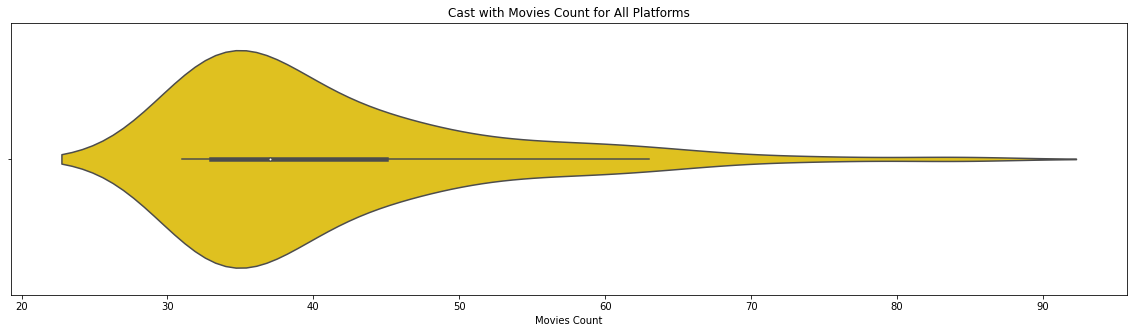

In [71]:
# Distribution of movies cast in each platform
plt.figure(figsize = (20, 5))
plt.title('Cast with Movies Count for All Platforms')
sns.violinplot(x = cast_data_movies['Movies Count'][:100], color = 'gold', legend = True, kde = True, shade = False)
plt.show()

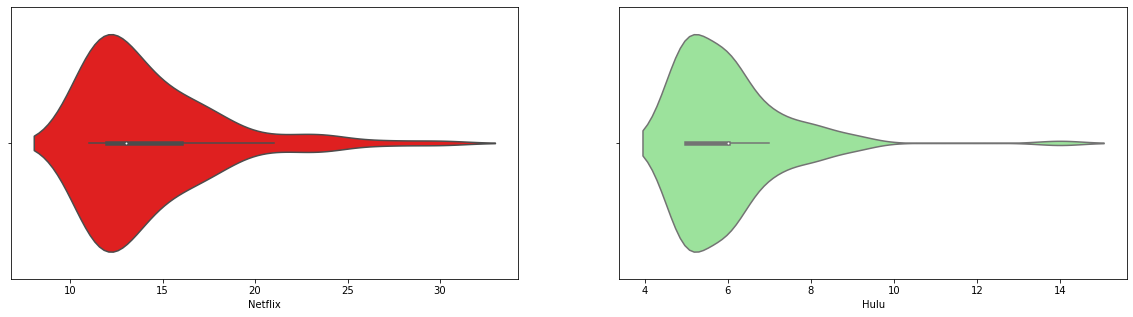

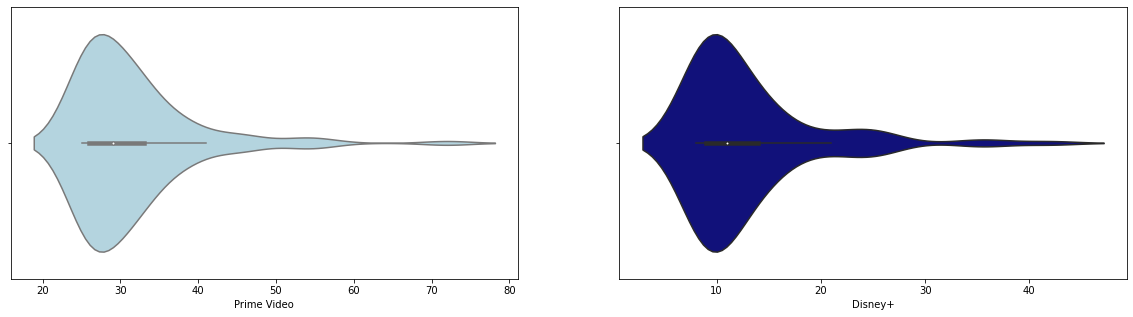

In [72]:
# Distribution of Cast Movies Count in each platform
f1, ax1 = plt.subplots(1, 2 , figsize = (20, 5))
sns.violinplot(x = netflix_cast_movies['Netflix'][:100], color = 'red', ax = ax1[0])
sns.violinplot(x = hulu_cast_movies['Hulu'][:100], color = 'lightgreen', ax = ax1[1])
 
f2, ax2 = plt.subplots(1, 2 , figsize = (20, 5))
sns.violinplot(x = prime_video_cast_movies['Prime Video'][:100], color = 'lightblue', ax = ax2[0])
sns.violinplot(x = disney_cast_movies['Disney+'][:100], color = 'darkblue', ax = ax2[1])
plt.show()

In [73]:
print(f'''
      Accross All Platforms the Average Movies Count of Cast is '{round(cast_data_movies['Movies Count'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Cast on 'Netflix' is '{round(netflix_cast_movies['Netflix'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Cast on 'Hulu' is '{round(hulu_cast_movies['Hulu'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Cast on 'Prime Video' is '{round(prime_video_cast_movies['Prime Video'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Cast on 'Disney+' is '{round(disney_cast_movies['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Movies Count of Cast is '1.68'

      The Average Movies Count of Cast on 'Netflix' is '1.32'

      The Average Movies Count of Cast on 'Hulu' is '1.15'

      The Average Movies Count of Cast on 'Prime Video' is '1.52'

      The Average Movies Count of Cast on 'Disney+' is '1.31'
 
      


In [74]:
print(f'''
      Accross All Platforms Total Count of Cast is '{cast_data_movies['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Netflix' is '{netflix_cast_movies['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Hulu' is '{hulu_cast_movies['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Prime Video' is '{prime_video_cast_movies['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Disney+' is '{disney_cast_movies['Cast'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Cast is '315871'

      Total Count of Cast on 'Netflix' is '91466'

      Total Count of Cast on 'Hulu' is '37628'

      Total Count of Cast on 'Prime Video' is '240844'

      Total Count of Cast on 'Disney+' is '20717'
 
      


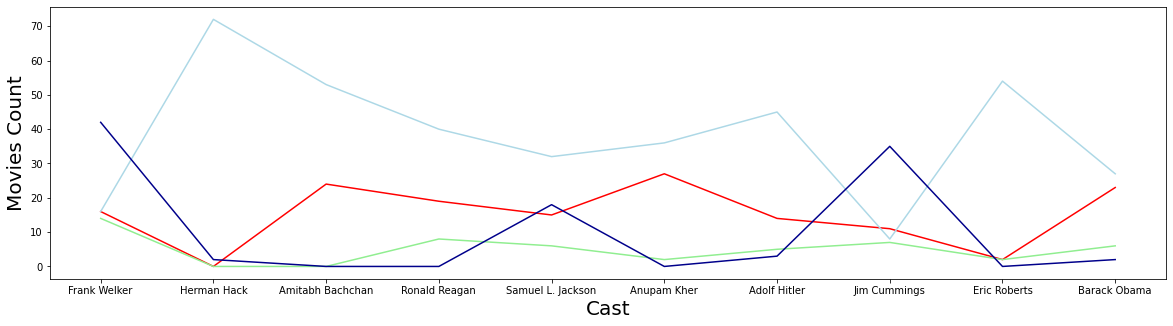

In [75]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = cast_data_movies['Cast'][:10], y = cast_data_movies['Netflix'][:10], color = 'red')
sns.lineplot(x = cast_data_movies['Cast'][:10], y = cast_data_movies['Hulu'][:10], color = 'lightgreen')
sns.lineplot(x = cast_data_movies['Cast'][:10], y = cast_data_movies['Prime Video'][:10], color = 'lightblue')
sns.lineplot(x = cast_data_movies['Cast'][:10], y = cast_data_movies['Disney+'][:10], color = 'darkblue')
plt.xlabel('Cast', fontsize = 20)
plt.ylabel('Movies Count', fontsize = 20)
plt.show()

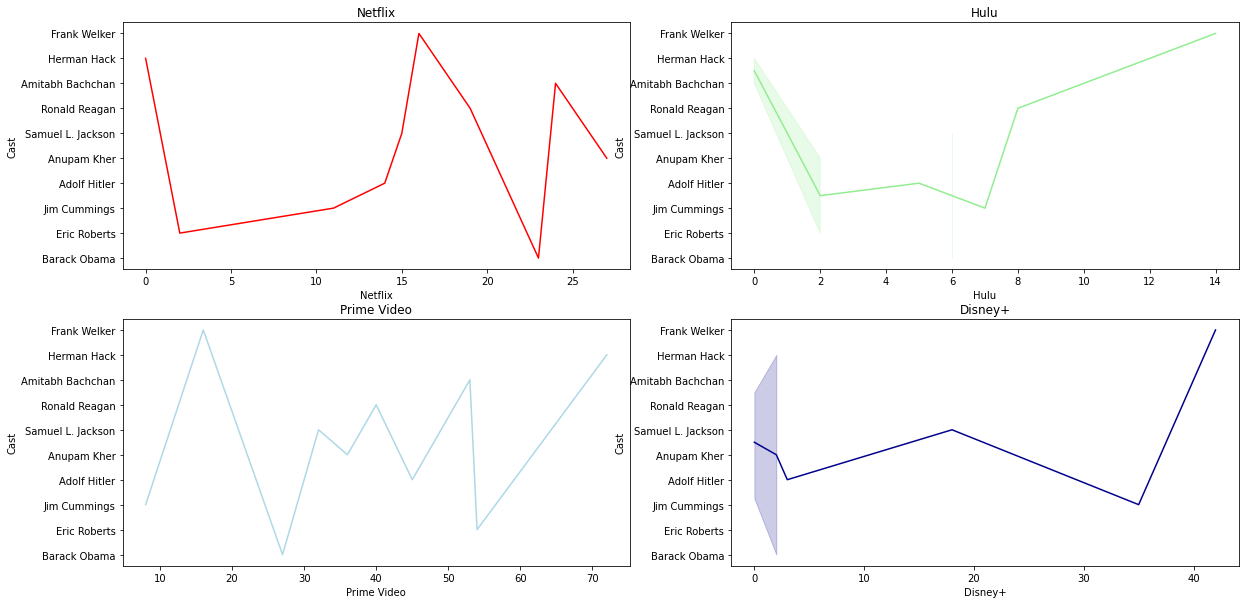

In [76]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_c_ax1 = sns.lineplot(y = cast_data_movies['Cast'][:10], x = cast_data_movies['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_c_ax2 = sns.lineplot(y = cast_data_movies['Cast'][:10], x = cast_data_movies['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_c_ax3 = sns.lineplot(y = cast_data_movies['Cast'][:10], x = cast_data_movies['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_c_ax4 = sns.lineplot(y = cast_data_movies['Cast'][:10], x = cast_data_movies['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_c_ax1.title.set_text(labels[0])
h_c_ax2.title.set_text(labels[1])
p_c_ax3.title.set_text(labels[2])
d_c_ax4.title.set_text(labels[3])
 
plt.show()

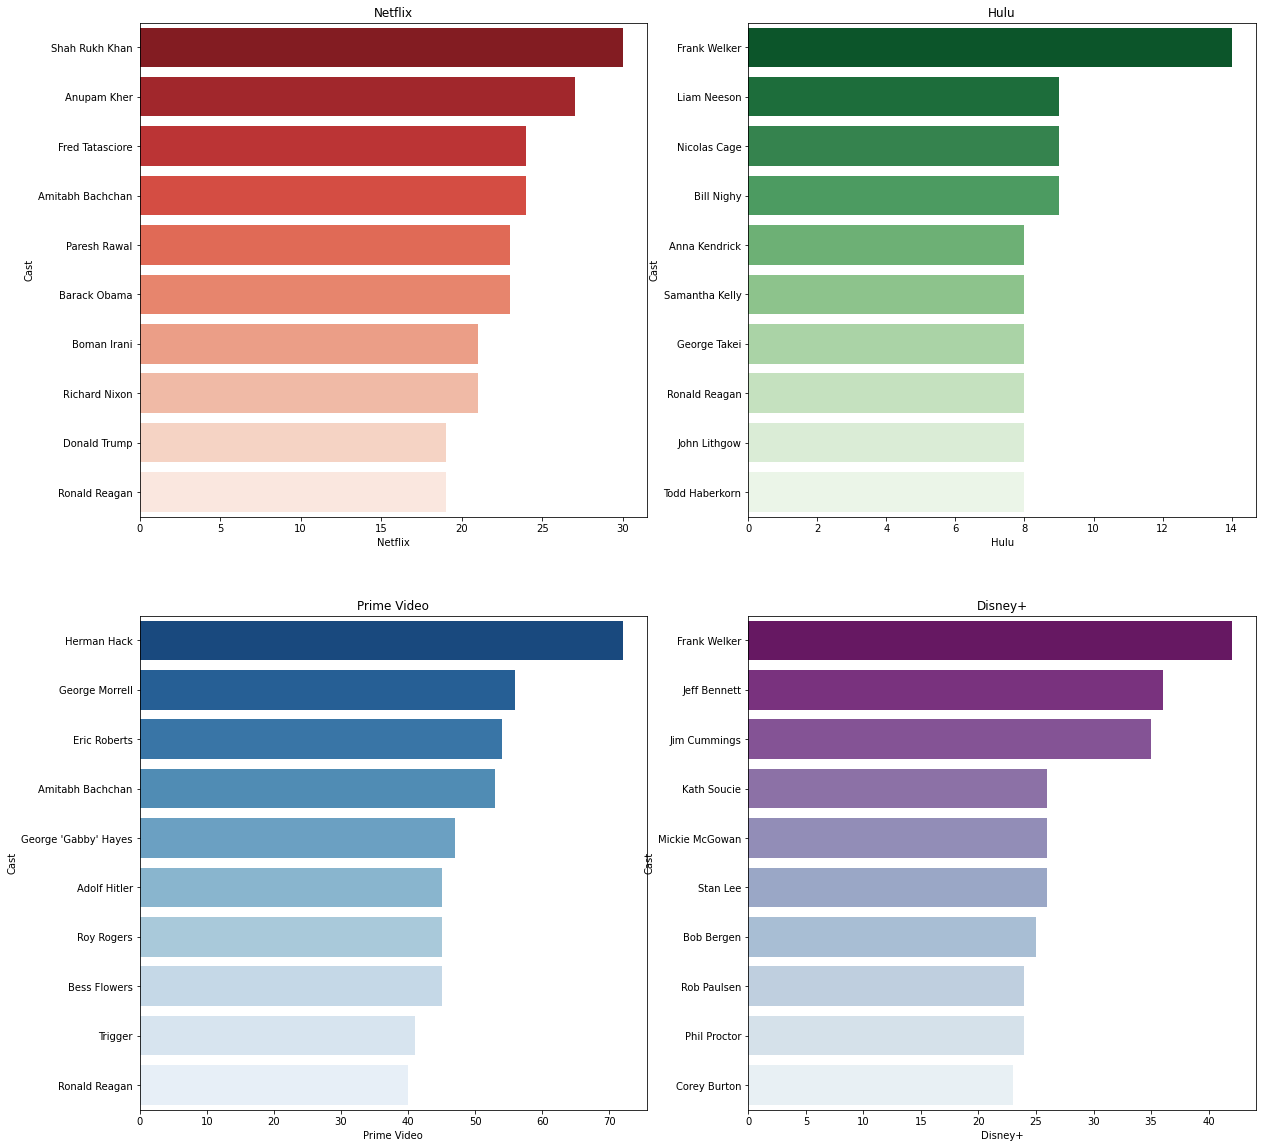

In [77]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_c_ax1 = sns.barplot(y = netflix_cast_movies['Cast'][:10], x = netflix_cast_movies['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_c_ax2 = sns.barplot(y = hulu_cast_movies['Cast'][:10], x = hulu_cast_movies['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_c_ax3 = sns.barplot(y = prime_video_cast_movies['Cast'][:10], x = prime_video_cast_movies['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_c_ax4 = sns.barplot(y = disney_cast_movies['Cast'][:10], x = disney_cast_movies['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_c_ax1.title.set_text(labels[0])
h_c_ax2.title.set_text(labels[1])
p_c_ax3.title.set_text(labels[2])
d_c_ax4.title.set_text(labels[3])
 
plt.show()

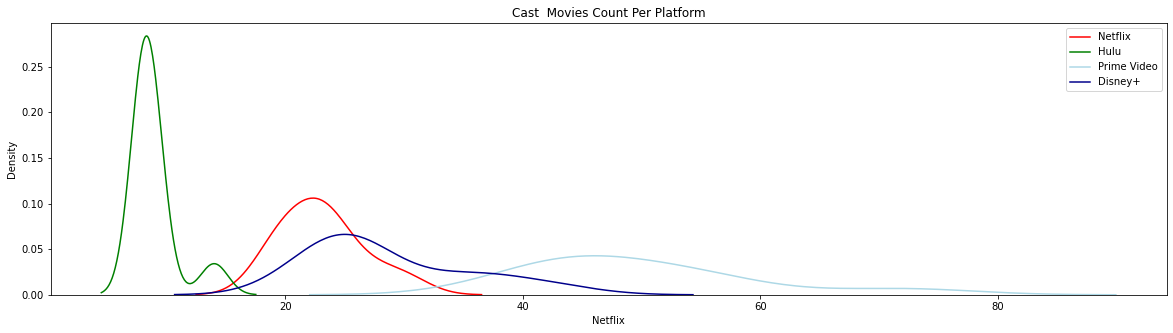

In [78]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Cast  Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_cast_movies['Netflix'][:10], color = 'red', legend = True)
sns.kdeplot(hulu_cast_movies['Hulu'][:10], color = 'green', legend = True)
sns.kdeplot(prime_video_cast_movies['Prime Video'][:10], color = 'lightblue', legend = True)
sns.kdeplot(disney_cast_movies['Disney+'][:10], color = 'darkblue', legend = True)                                      
                                      
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

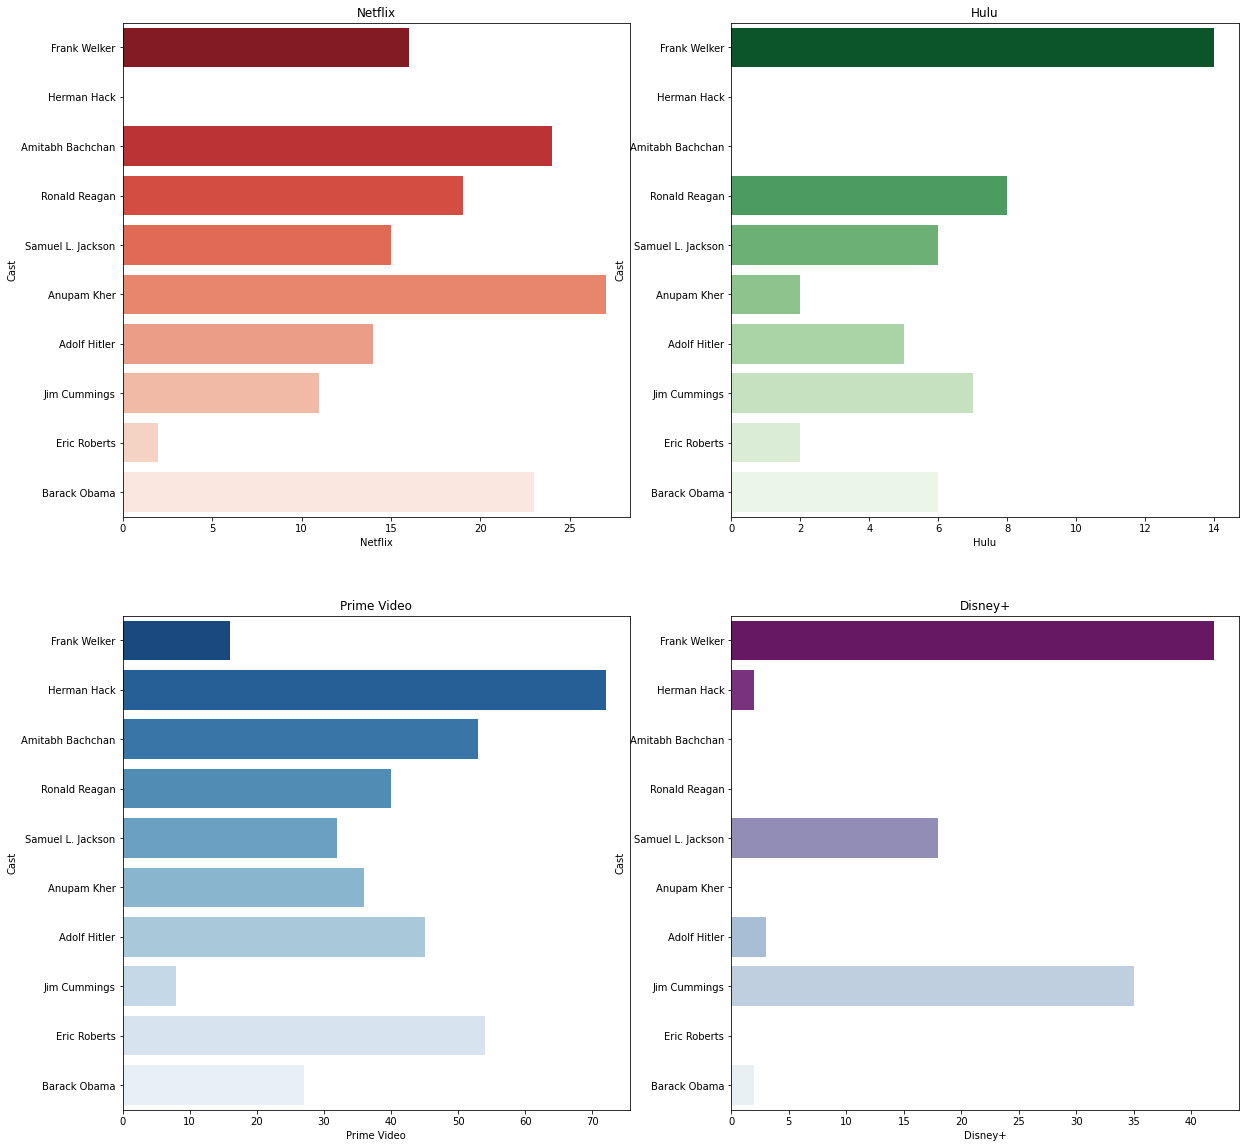

In [79]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_c_ax1 = sns.barplot(y = cast_data_movies['Cast'][:10], x = cast_data_movies['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_c_ax2 = sns.barplot(y = cast_data_movies['Cast'][:10], x = cast_data_movies['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_c_ax3 = sns.barplot(y = cast_data_movies['Cast'][:10], x = cast_data_movies['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_c_ax4 = sns.barplot(y = cast_data_movies['Cast'][:10], x = cast_data_movies['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_c_ax1.title.set_text(labels[0])
h_c_ax2.title.set_text(labels[1])
p_c_ax3.title.set_text(labels[2])
d_c_ax4.title.set_text(labels[3])
 
plt.show()

In [80]:
df_movies_mixed_casts.drop(df_movies_mixed_casts.loc[df_movies_mixed_casts['Cast'] == "NA"].index, inplace = True)
# df_movies_mixed_casts = df_movies_mixed_casts[df_movies_mixed_casts.Cast != "NA"]
df_movies_mixed_casts.drop(df_movies_mixed_casts.loc[df_movies_mixed_casts['Number of Casts'] == 1].index, inplace = True)

In [81]:
df_movies_mixed_casts.head(5)

ID                           Title  Year Age IMDb Rotten Tomatoes  \
0   1                       Inception  2010  13  8.8              87   
1   2                      The Matrix  1999  16  8.7              88   
2   3          Avengers: Infinity War  2018  13  8.4              85   
3   4              Back to the Future  1985   7  8.5              96   
4   5  The Good, the Bad and the Ugly  1966  16  8.8              97   

                        Directors  \
0               Christopher Nolan   
1  Lana Wachowski,Lilly Wachowski   
2         Anthony Russo,Joe Russo   
3                 Robert Zemeckis   
4                    Sergio Leone   

                                                Cast  \
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
1  Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...   
2  Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...   
3  Michael J. Fox,Christopher Lloyd,Lea Thompson,...   
4  Eli Wallach,Clint Eastwood,Lee Van Cleef,Aldo ...   

                             Genres                                 Country  \
0  Action,Adventure,Sci-Fi,Thriller            United States,United Kingdom   
1                     Action,Sci-Fi                           United States   
2           Action,Adventure,Sci-Fi                           United States   
3           Adventure,Comedy,Sci-Fi                           United States   
4                           Western  Italy,Spain,West Germany,United States   

   ...                                           Plotline Runtime   Kind  \
0  ...  Dom Cobb is a skilled thief, the absolute best...     148  movie   
1  ...  Thomas A. Anderson is a man living two lives. ...     136  movie   
2  ...  As the Avengers and their allies have continue...     149  movie   
3  ...  Marty McFly, a typical American teenager of th...     116  movie   
4  ...  Blondie (The Good) (Clint Eastwood) is a profe...     161  movie   

  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider Number of Casts  
0       1     0            0        0     0           Netflix              84  
1       1     0            0        0     0           Netflix              41  
2       1     0            0        0     0           Netflix             141  
3       1     0            0        0     0           Netflix              59  
4       1     0            1        0     0           Netflix              54  

[5 rows x 21 columns]

In [82]:
mixed_casts_count = df_movies_mixed_casts.groupby('Cast')['Title'].count()
mixed_casts_movies = df_movies_mixed_casts.groupby('Cast')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
mixed_casts_data_movies = pd.concat([mixed_casts_count, mixed_casts_movies], axis = 1).reset_index().rename(columns = {'Title' : 'Movies Count', 'Cast' : 'Mixed Cast'})
mixed_casts_data_movies = mixed_casts_data_movies.sort_values(by = 'Movies Count', ascending = False)

In [83]:
mixed_casts_data_movies.head(5)

Mixed Cast  Movies Count  \
3678   Dennis Quaid,Greg Kinnear,Common,Charlie Saxto...             5   
13311  Shauna Macdonald,Natalie Mendoza,Alex Reid,Sas...             4   
4304   Elliot Page,Hayley McFarland,Nick Searcy,Romy ...             3   
7261   John Friedrich,Adrian Zmed,Ernest Harden Jr.,L...             3   
3888   Dominique Swain,Brad Renfro,Bijou Phillips,Mis...             3   

       Netflix  Hulu  Prime Video  Disney+  
3678         2     0            4        0  
13311        0     1            4        0  
4304         1     0            2        0  
7261         0     0            3        0  
3888         0     0            3        0

In [84]:
# Mixed Cast with Movies Counts - All Platforms Combined
mixed_casts_data_movies.sort_values(by = 'Movies Count', ascending = False)[:10]

Mixed Cast  Movies Count  \
3678   Dennis Quaid,Greg Kinnear,Common,Charlie Saxto...             5   
13311  Shauna Macdonald,Natalie Mendoza,Alex Reid,Sas...             4   
4304   Elliot Page,Hayley McFarland,Nick Searcy,Romy ...             3   
7261   John Friedrich,Adrian Zmed,Ernest Harden Jr.,L...             3   
3888   Dominique Swain,Brad Renfro,Bijou Phillips,Mis...             3   
15240  Yuliya Peresild,Evgeniy Tsyganov,Oleg Vasilkov...             3   
3608         Deepak Chachra,Smita Malhotra,Tarun Ratnani             3   
10000  Mel Brooks,Dom DeLuise,Madeline Kahn,Harvey Ko...             3   
1383   Barbara Alyn Woods,Tina Ivlev,Lexi Ainsworth,B...             2   
13732  Steve Carell,Sheryl Lee,Todd Weeks,Paul Schack...             2   

       Netflix  Hulu  Prime Video  Disney+  
3678         2     0            4        0  
13311        0     1            4        0  
4304         1     0            2        0  
7261         0     0            3        0  
3888         0     0            3        0  
15240        0     0            3        0  
3608         3     0            0        0  
10000        0     0            3        0  
1383         0     0            2        0  
13732        0     0            2        0

In [85]:
df_mixed_casts_high_movies = mixed_casts_data_movies.sort_values(by = 'Movies Count', ascending = False).reset_index()
df_mixed_casts_high_movies = df_mixed_casts_high_movies.drop(['index'], axis = 1)
# filter = (mixed_casts_data_movies['Movies Count'] = =  (mixed_casts_data_movies['Movies Count'].max()))
# df_mixed_casts_high_movies = mixed_casts_data_movies[filter]
 
# highest_rated_movies = mixed_casts_data_movies.loc[mixed_casts_data_movies['Movies Count'].idxmax()]
 
print('\nMixed Cast with Highest Ever Movies Count are : All Platforms Combined\n')
df_mixed_casts_high_movies.head(5)


Mixed Cast with Highest Ever Movies Count are : All Platforms Combined



Mixed Cast  Movies Count  Netflix  \
0  Dennis Quaid,Greg Kinnear,Common,Charlie Saxto...             5        2   
1  Shauna Macdonald,Natalie Mendoza,Alex Reid,Sas...             4        0   
2  Elliot Page,Hayley McFarland,Nick Searcy,Romy ...             3        1   
3  John Friedrich,Adrian Zmed,Ernest Harden Jr.,L...             3        0   
4  Dominique Swain,Brad Renfro,Bijou Phillips,Mis...             3        0   

   Hulu  Prime Video  Disney+  
0     0            4        0  
1     1            4        0  
2     0            2        0  
3     0            3        0  
4     0            3        0

In [86]:
fig = px.bar(y = df_mixed_casts_high_movies['Mixed Cast'][:15],
             x = df_mixed_casts_high_movies['Movies Count'][:15], 
             color = df_mixed_casts_high_movies['Movies Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Mixed Cast'},
             title  = 'Movies with Highest Number of Mixed Casts : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [87]:
df_mixed_casts_low_movies = mixed_casts_data_movies.sort_values(by = 'Movies Count', ascending = True).reset_index()
df_mixed_casts_low_movies = df_mixed_casts_low_movies.drop(['index'], axis = 1)
# filter = (mixed_casts_data_movies['Movies Count'] = =  (mixed_casts_data_movies['Movies Count'].min()))
# df_mixed_casts_low_movies = mixed_casts_data_movies[filter]
 
print('\nMixed Cast with Lowest Ever Movies Count are : All Platforms Combined\n')
df_mixed_casts_low_movies.head(5)


Mixed Cast with Lowest Ever Movies Count are : All Platforms Combined



Mixed Cast  Movies Count  Netflix  \
0  Ryan Barton-Grimley,Jeremy Clark,Jes Mercer,Jo...             1        0   
1  Adriano Tardiolo,Agnese Graziani,Alba Rohrwach...             1        1   
2  Adrien Brody,Antonio Banderas,John Malkovich,R...             1        1   
3  Adrien Brody,Emilia Fox,Michal Zebrowski,Ed St...             1        1   
4  Adrien Gamache,Nathan Hamer,Trey Hatch,Selena ...             1        0   

   Hulu  Prime Video  Disney+  
0     0            1        0  
1     0            0        0  
2     0            0        0  
3     0            1        0  
4     0            1        0

In [88]:
fig = px.bar(y = df_mixed_casts_low_movies['Mixed Cast'][:15],
             x = df_mixed_casts_low_movies['Movies Count'][:15], 
             color = df_mixed_casts_low_movies['Movies Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Mixed Cast'},
             title  = 'Movies with Lowest Number of Mixed Casts : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [89]:
print(f'''
      Total '{df_movies_casts['Cast'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see Movies from Total '{mixed_casts_data_movies['Mixed Cast'].unique().shape[0]}' Mixed Cast, They were Like this, \n
 
      {mixed_casts_data_movies.sort_values(by = 'Movies Count', ascending = False)['Mixed Cast'].head(5).unique()} etc. \n
 
      The Mixed Cast with Highest Movies Count have '{mixed_casts_data_movies['Movies Count'].max()}' Movies Available is '{df_mixed_casts_high_movies['Mixed Cast'][0]}', &\n
      The Mixed Cast with Lowest Movies Count have '{mixed_casts_data_movies['Movies Count'].min()}' Movies Available is '{df_mixed_casts_low_movies['Mixed Cast'][0]}'
      ''')


      Total '16275' Titles are available on All Platforms, out of which

      You Can Choose to see Movies from Total '15354' Mixed Cast, They were Like this, 

 
      ['Dennis Quaid,Greg Kinnear,Common,Charlie Saxton,Will Sasso,Odessa Rae,Seth MacFarlane,Mike Meldman,Hugh Jackman,Kate Winslet,Julie Claire,Katie Finneran,Roy Jenkins,Rocky Russo,Anna Madigan,Jeremy Allen White,Liev Schreiber,Naomi Watts,Alex Cranmer,Julie Ann Emery,Austin Cope,Anna Faris,Chris Pratt,J.B. Smoove,Jarrad Paul,Maria Arcé,Aaron LaPlante,Kieran Culkin,Emma Stone,Arthur French,Josh Shuman,Cathy Cliften,Cherina Monteniques Scott,Richard Gere,Kate Bosworth,Jack McBrayer,Aasif Mandvi,Zach Lasry,Darby Lynn Totten,Marc Ambrose,Justin Long,Jason Sudeikis,Uma Thurman,Bobby Cannavale,Kristen Bell,John Hodgman,Leslie Bibb,Will Carlough,Katrina Bowden,Phil Crowley,Ed Blythe,Olivia Roberts Payne,Monique Delee,Julie McNiven,Jaron Henrie-McCrea,Sebastian Banes,Severyn Banes,Rightor Doyle,Raven Burnett,Montana Byrne,Jarr

In [90]:
fig = px.pie(mixed_casts_data_movies[:10], names = 'Mixed Cast', values = 'Movies Count', color_discrete_sequence = px.colors.sequential.Teal)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label', title = 'Movies Count based on Mixed Cast')
fig.show()

In [91]:
# netflix_mixed_casts_movies = mixed_casts_data_movies[mixed_casts_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_mixed_casts_movies = netflix_mixed_casts_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
netflix_mixed_casts_high_movies = df_mixed_casts_high_movies.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_mixed_casts_high_movies = netflix_mixed_casts_high_movies.drop(['index'], axis = 1)
 
netflix_mixed_casts_low_movies = df_mixed_casts_high_movies.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_mixed_casts_low_movies = netflix_mixed_casts_low_movies.drop(['index'], axis = 1)
 
netflix_mixed_casts_high_movies.head(5)

Mixed Cast  Movies Count  Netflix  \
0        Deepak Chachra,Smita Malhotra,Tarun Ratnani             3        3   
1  Dennis Quaid,Greg Kinnear,Common,Charlie Saxto...             5        2   
2  Christian Bale,Dominic Purcell,Sean Bean,Chris...             2        2   
3  Ice Cube,Nia Long,John C. McGinley,Aleisha All...             2        2   
4  Milla Jovovich,Oded Fehr,Ali Larter,Iain Glen,...             2        2   

   Hulu  Prime Video  Disney+  
0     0            0        0  
1     0            4        0  
2     0            0        0  
3     0            1        0  
4     0            0        0

In [92]:
# hulu_mixed_casts_movies = mixed_casts_data_movies[mixed_casts_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_mixed_casts_movies = hulu_mixed_casts_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
hulu_mixed_casts_high_movies = df_mixed_casts_high_movies.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_mixed_casts_high_movies = hulu_mixed_casts_high_movies.drop(['index'], axis = 1)
 
hulu_mixed_casts_low_movies = df_mixed_casts_high_movies.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_mixed_casts_low_movies = hulu_mixed_casts_low_movies.drop(['index'], axis = 1)
 
hulu_mixed_casts_high_movies.head(5)

Mixed Cast  Movies Count  Netflix  \
0  Asa Butterfield,Sophie Turner,Skyler Gisondo,W...             2        0   
1  Jeannie Elias,Kat Feller,Sandy Fox,Cindy Robin...             2        2   
2  Penélope Cruz,Carmen Maura,Lola Dueñas,Blanca ...             2        0   
3  Katie Holmes,Benjamin Bratt,Charlie Hunnam,Zoo...             2        0   
4  Robert De Niro,Ray Liotta,Joe Pesci,Lorraine B...             2        0   

   Hulu  Prime Video  Disney+  
0     2            0        0  
1     2            0        0  
2     2            0        0  
3     2            0        0  
4     2            0        0

In [93]:
# prime_video_mixed_casts_movies = mixed_casts_data_movies[mixed_casts_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_mixed_casts_movies = prime_video_mixed_casts_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)
 
prime_video_mixed_casts_high_movies = df_mixed_casts_high_movies.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_mixed_casts_high_movies = prime_video_mixed_casts_high_movies.drop(['index'], axis = 1)
 
prime_video_mixed_casts_low_movies = df_mixed_casts_high_movies.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_mixed_casts_low_movies = prime_video_mixed_casts_low_movies.drop(['index'], axis = 1)
 
prime_video_mixed_casts_high_movies.head(5)

Mixed Cast  Movies Count  Netflix  \
0  Dennis Quaid,Greg Kinnear,Common,Charlie Saxto...             5        2   
1  Shauna Macdonald,Natalie Mendoza,Alex Reid,Sas...             4        0   
2  John Friedrich,Adrian Zmed,Ernest Harden Jr.,L...             3        0   
3  Dominique Swain,Brad Renfro,Bijou Phillips,Mis...             3        0   
4  Yuliya Peresild,Evgeniy Tsyganov,Oleg Vasilkov...             3        0   

   Hulu  Prime Video  Disney+  
0     0            4        0  
1     1            4        0  
2     0            3        0  
3     0            3        0  
4     0            3        0

In [94]:
# disney_mixed_casts_movies = mixed_casts_data_movies[mixed_casts_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_mixed_casts_movies = disney_mixed_casts_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)
 
disney_mixed_casts_high_movies = df_mixed_casts_high_movies.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_mixed_casts_high_movies = disney_mixed_casts_high_movies.drop(['index'], axis = 1)
 
disney_mixed_casts_low_movies = df_mixed_casts_high_movies.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_mixed_casts_low_movies = disney_mixed_casts_low_movies.drop(['index'], axis = 1)
 
disney_mixed_casts_high_movies.head(5)

Mixed Cast  Movies Count  Netflix  \
0  Hayley Mills,Dean Jones,Dorothy Provine,Roddy ...             2        0   
1  Jeff Bridges,Garrett Hedlund,Olivia Wilde,Bruc...             2        0   
2                         Winston Hibler,Mogens Lind             2        0   
3  Joshua Bassett,Corbin Bleu,Matt Cornett,Tim Fe...             2        0   
4  Joaquin Phoenix,Jeremy Suarez,Jason Raize,Rick...             2        0   

   Hulu  Prime Video  Disney+  
0     0            0        2  
1     0            0        2  
2     0            0        2  
3     0            0        2  
4     0            1        2

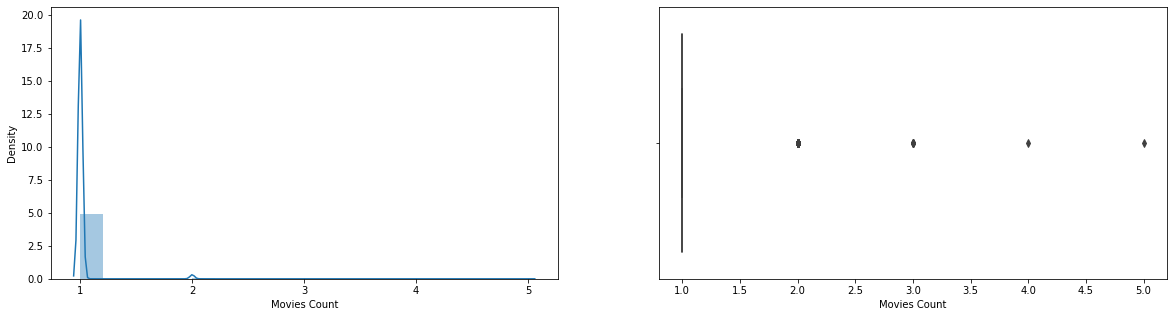

In [95]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(mixed_casts_data_movies['Movies Count'], bins = 20, kde = True, ax = ax[0])
sns.boxplot(mixed_casts_data_movies['Movies Count'], ax = ax[1])
plt.show()

In [96]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_mixed_casts_movies = mixed_casts_data_movies[mixed_casts_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_mixed_casts_movies = netflix_mixed_casts_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

hulu_mixed_casts_movies = mixed_casts_data_movies[mixed_casts_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_mixed_casts_movies = hulu_mixed_casts_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

prime_video_mixed_casts_movies = mixed_casts_data_movies[mixed_casts_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_mixed_casts_movies = prime_video_mixed_casts_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)

disney_mixed_casts_movies = mixed_casts_data_movies[mixed_casts_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_mixed_casts_movies = disney_mixed_casts_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)

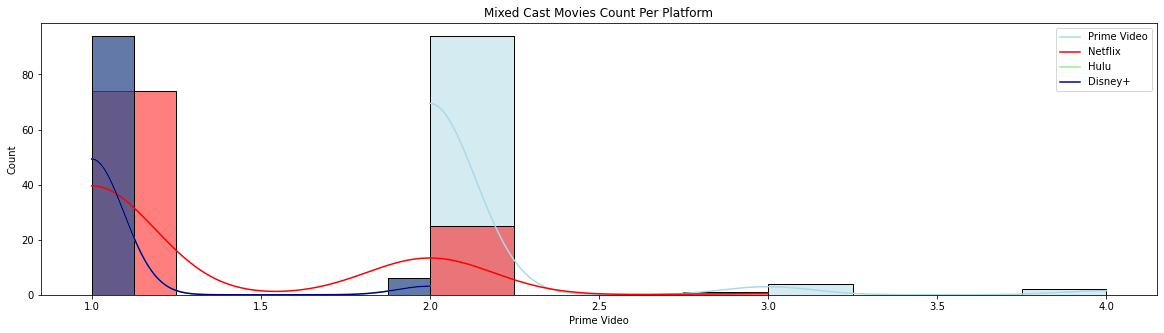

In [97]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Mixed Cast Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(prime_video_mixed_casts_movies['Prime Video'][:100], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_mixed_casts_movies['Netflix'][:100], color = 'red', legend = True, kde = True)
sns.histplot(hulu_mixed_casts_movies['Hulu'][:100], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_mixed_casts_movies['Disney+'][:100], color = 'darkblue', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [98]:
print(f'''
      The Mixed Cast with Highest Movies Count Ever Got is '{df_mixed_casts_high_movies['Mixed Cast'][0]}' : '{df_mixed_casts_high_movies['Movies Count'].max()}'\n
      The Mixed Cast with Lowest Movies Count Ever Got is '{df_mixed_casts_low_movies['Mixed Cast'][0]}' : '{df_mixed_casts_low_movies['Movies Count'].min()}'\n
      
      The Mixed Cast with Highest Movies Count on 'Netflix' is '{netflix_mixed_casts_high_movies['Mixed Cast'][0]}' : '{netflix_mixed_casts_high_movies['Netflix'].max()}'\n
      The Mixed Cast with Lowest Movies Count on 'Netflix' is '{netflix_mixed_casts_low_movies['Mixed Cast'][0]}' : '{netflix_mixed_casts_low_movies['Netflix'].min()}'\n
      
      The Mixed Cast with Highest Movies Count on 'Hulu' is '{hulu_mixed_casts_high_movies['Mixed Cast'][0]}' : '{hulu_mixed_casts_high_movies['Hulu'].max()}'\n
      The Mixed Cast with Lowest Movies Count on 'Hulu' is '{hulu_mixed_casts_low_movies['Mixed Cast'][0]}' : '{hulu_mixed_casts_low_movies['Hulu'].min()}'\n
      
      The Mixed Cast with Highest Movies Count on 'Prime Video' is '{prime_video_mixed_casts_high_movies['Mixed Cast'][0]}' : '{prime_video_mixed_casts_high_movies['Prime Video'].max()}'\n
      The Mixed Cast with Lowest Movies Count on 'Prime Video' is '{prime_video_mixed_casts_low_movies['Mixed Cast'][0]}' : '{prime_video_mixed_casts_low_movies['Prime Video'].min()}'\n
      
      The Mixed Cast with Highest Movies Count on 'Disney+' is '{disney_mixed_casts_high_movies['Mixed Cast'][0]}' : '{disney_mixed_casts_high_movies['Disney+'].max()}'\n
      The Mixed Cast with Lowest Movies Count on 'Disney+' is '{disney_mixed_casts_low_movies['Mixed Cast'][0]}' : '{disney_mixed_casts_low_movies['Disney+'].min()}'\n 
      ''')


      The Mixed Cast with Highest Movies Count Ever Got is 'Dennis Quaid,Greg Kinnear,Common,Charlie Saxton,Will Sasso,Odessa Rae,Seth MacFarlane,Mike Meldman,Hugh Jackman,Kate Winslet,Julie Claire,Katie Finneran,Roy Jenkins,Rocky Russo,Anna Madigan,Jeremy Allen White,Liev Schreiber,Naomi Watts,Alex Cranmer,Julie Ann Emery,Austin Cope,Anna Faris,Chris Pratt,J.B. Smoove,Jarrad Paul,Maria Arcé,Aaron LaPlante,Kieran Culkin,Emma Stone,Arthur French,Josh Shuman,Cathy Cliften,Cherina Monteniques Scott,Richard Gere,Kate Bosworth,Jack McBrayer,Aasif Mandvi,Zach Lasry,Darby Lynn Totten,Marc Ambrose,Justin Long,Jason Sudeikis,Uma Thurman,Bobby Cannavale,Kristen Bell,John Hodgman,Leslie Bibb,Will Carlough,Katrina Bowden,Phil Crowley,Ed Blythe,Olivia Roberts Payne,Monique Delee,Julie McNiven,Jaron Henrie-McCrea,Sebastian Banes,Severyn Banes,Rightor Doyle,Raven Burnett,Montana Byrne,Jarrett Carter,Phillip Michaels,Christopher Mintz-Plasse,Chloë Grace Moretz,Patrick Warburton,Jimmy Bennett,Matt Wal

In [99]:
print(f'''
      Accross All Platforms the Average Movies Count of Mixed Cast is '{round(mixed_casts_data_movies['Movies Count'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Mixed Cast on 'Netflix' is '{round(netflix_mixed_casts_movies['Netflix'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Mixed Cast on 'Hulu' is '{round(hulu_mixed_casts_movies['Hulu'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Mixed Cast on 'Prime Video' is '{round(prime_video_mixed_casts_movies['Prime Video'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Mixed Cast on 'Disney+' is '{round(disney_mixed_casts_movies['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Movies Count of Mixed Cast is '1.02'

      The Average Movies Count of Mixed Cast on 'Netflix' is '1.01'

      The Average Movies Count of Mixed Cast on 'Hulu' is '1.01'

      The Average Movies Count of Mixed Cast on 'Prime Video' is '1.01'

      The Average Movies Count of Mixed Cast on 'Disney+' is '1.01'
 
      


In [100]:
print(f'''
      Accross All Platforms Total Count of Mixed Cast is '{mixed_casts_data_movies['Mixed Cast'].unique().shape[0]}'\n
      Total Count of Mixed Cast on 'Netflix' is '{netflix_mixed_casts_movies['Mixed Cast'].unique().shape[0]}'\n
      Total Count of Mixed Cast on 'Hulu' is '{hulu_mixed_casts_movies['Mixed Cast'].unique().shape[0]}'\n
      Total Count of Mixed Cast on 'Prime Video' is '{prime_video_mixed_casts_movies['Mixed Cast'].unique().shape[0]}'\n
      Total Count of Mixed Cast on 'Disney+' is '{disney_mixed_casts_movies['Mixed Cast'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Mixed Cast is '15354'

      Total Count of Mixed Cast on 'Netflix' is '3229'

      Total Count of Mixed Cast on 'Hulu' is '1024'

      Total Count of Mixed Cast on 'Prime Video' is '11280'

      Total Count of Mixed Cast on 'Disney+' is '528'
 
      


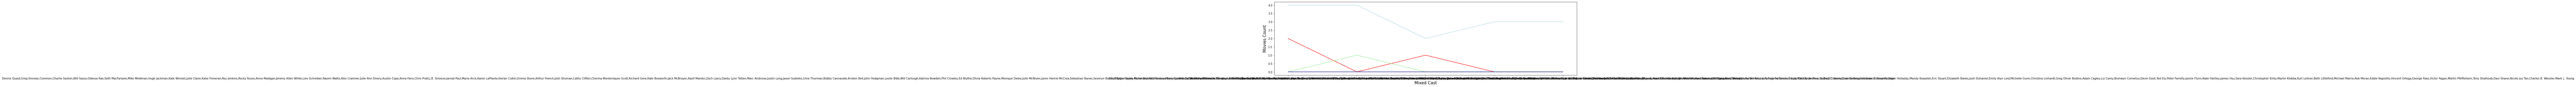

In [101]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = mixed_casts_data_movies['Mixed Cast'][:5], y = mixed_casts_data_movies['Netflix'][:5], color = 'red')
sns.lineplot(x = mixed_casts_data_movies['Mixed Cast'][:5], y = mixed_casts_data_movies['Hulu'][:5], color = 'lightgreen')
sns.lineplot(x = mixed_casts_data_movies['Mixed Cast'][:5], y = mixed_casts_data_movies['Prime Video'][:5], color = 'lightblue')
sns.lineplot(x = mixed_casts_data_movies['Mixed Cast'][:5], y = mixed_casts_data_movies['Disney+'][:5], color = 'darkblue')
plt.xlabel('Mixed Cast', fontsize = 15)
plt.ylabel('Movies Count', fontsize = 15)
plt.show()

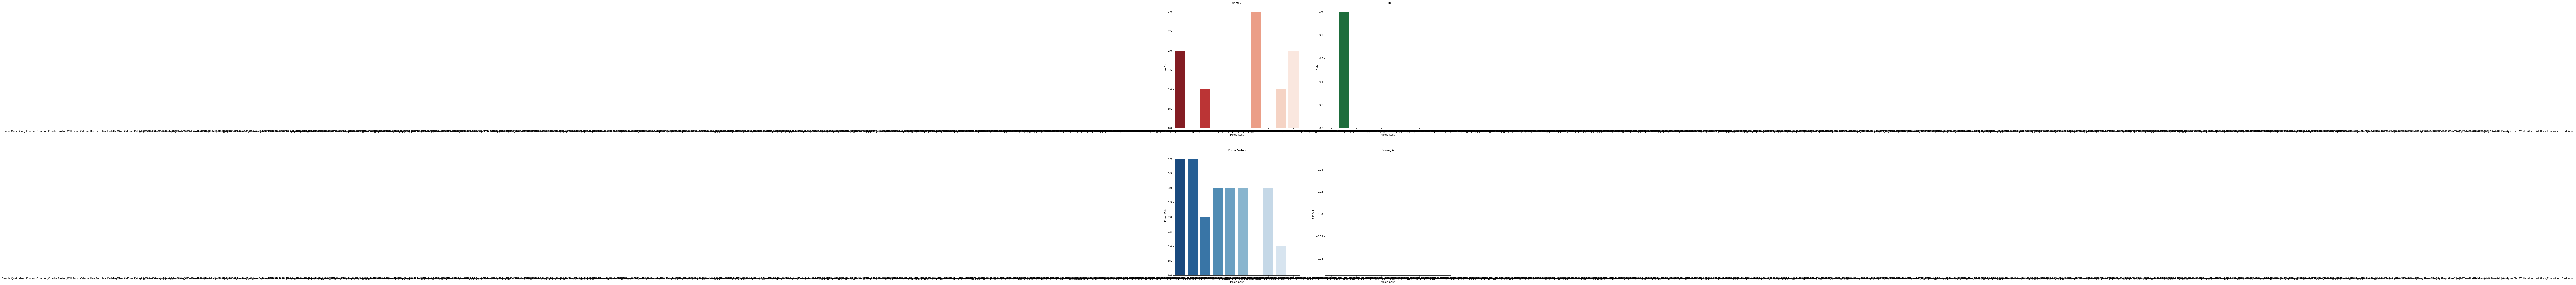

In [102]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_c_ax1 = sns.barplot(x = mixed_casts_data_movies['Mixed Cast'][:10], y = mixed_casts_data_movies['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_c_ax2 = sns.barplot(x = mixed_casts_data_movies['Mixed Cast'][:10], y = mixed_casts_data_movies['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_c_ax3 = sns.barplot(x = mixed_casts_data_movies['Mixed Cast'][:10], y = mixed_casts_data_movies['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_c_ax4 = sns.barplot(x = mixed_casts_data_movies['Mixed Cast'][:10], y = mixed_casts_data_movies['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_c_ax1.title.set_text(labels[0])
h_c_ax2.title.set_text(labels[1])
p_c_ax3.title.set_text(labels[2])
d_c_ax4.title.set_text(labels[3])
 
plt.show()

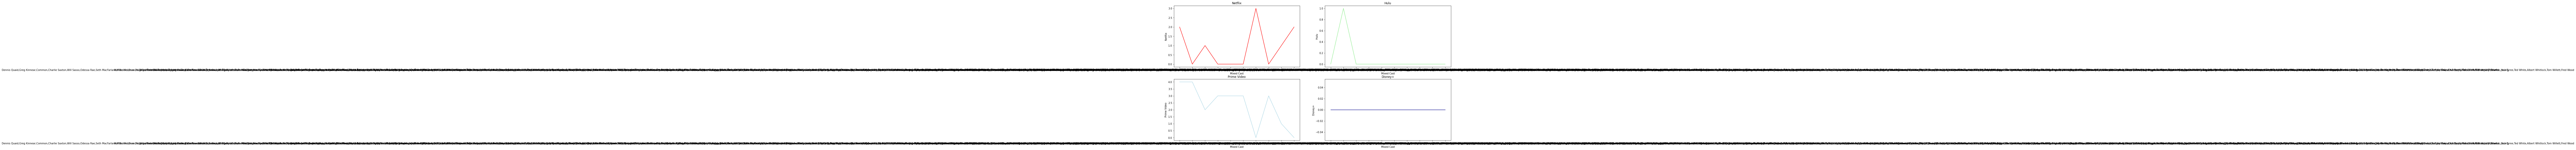

In [103]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_mc_ax1 = sns.lineplot(x = mixed_casts_data_movies['Mixed Cast'][:10], y = mixed_casts_data_movies['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_mc_ax2 = sns.lineplot(x = mixed_casts_data_movies['Mixed Cast'][:10], y = mixed_casts_data_movies['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_mc_ax3 = sns.lineplot(x = mixed_casts_data_movies['Mixed Cast'][:10], y = mixed_casts_data_movies['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_mc_ax4 = sns.lineplot(x = mixed_casts_data_movies['Mixed Cast'][:10], y = mixed_casts_data_movies['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_mc_ax1.title.set_text(labels[0])
h_mc_ax2.title.set_text(labels[1])
p_mc_ax3.title.set_text(labels[2])
d_mc_ax4.title.set_text(labels[3])
 
plt.show()

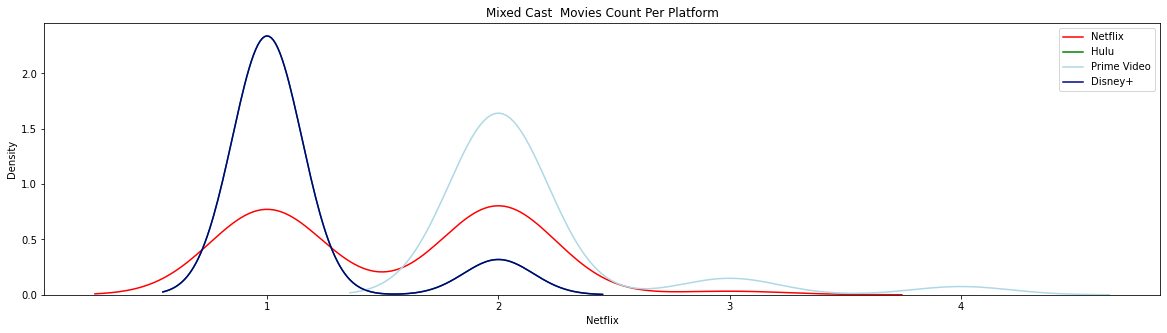

In [104]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Mixed Cast  Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_mixed_casts_movies['Netflix'][:50], color = 'red', legend = True)
sns.kdeplot(hulu_mixed_casts_movies['Hulu'][:50], color = 'green', legend = True)
sns.kdeplot(prime_video_mixed_casts_movies['Prime Video'][:50], color = 'lightblue', legend = True)
sns.kdeplot(disney_mixed_casts_movies['Disney+'][:50], color = 'darkblue', legend = True)                                      

# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

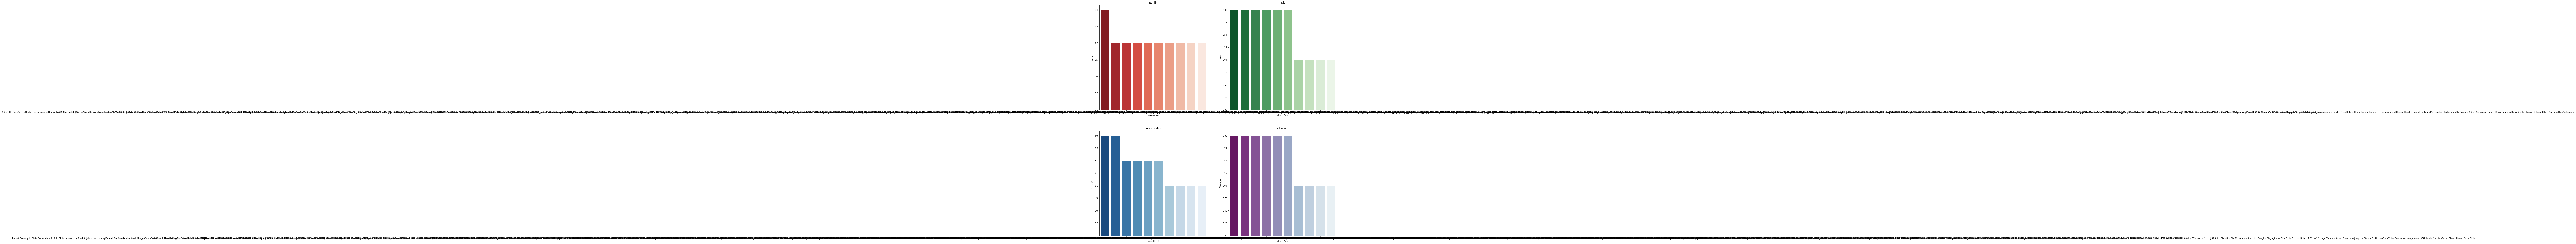

In [105]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_mc_ax1 = sns.barplot(x = netflix_mixed_casts_movies['Mixed Cast'][:10], y = netflix_mixed_casts_movies['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_mc_ax2 = sns.barplot(x = hulu_mixed_casts_movies['Mixed Cast'][:10], y = hulu_mixed_casts_movies['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_mc_ax3 = sns.barplot(x = prime_video_mixed_casts_movies['Mixed Cast'][:10], y = prime_video_mixed_casts_movies['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_mc_ax4 = sns.barplot(x = disney_mixed_casts_movies['Mixed Cast'][:10], y = disney_mixed_casts_movies['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_mc_ax1.title.set_text(labels[0])
h_mc_ax2.title.set_text(labels[1])
p_mc_ax3.title.set_text(labels[2])
d_mc_ax4.title.set_text(labels[3])
 
plt.show()

In [106]:
fig = go.Figure(go.Funnel(y = mixed_casts_data_movies['Mixed Cast'][:10], x = mixed_casts_data_movies['Movies Count'][:10]))
fig.show()